# Entrega 1: Ejercicio 1. Parte 1.

**Asignatura**: Machine Learning, 2025/2026

**Profesora**: Raquel Martinez España

**Máster en Inteligencia Artificial**

**Autores:**  
- Jesús Guirado Pérez  
- Antonio Luis Sánchez Torres  
- Víctor Emilio Vicente García

# Índice
1. [Introducción](#introducción)
   1. [Problema](#problema)
   2. [Metodología](#metodología)
3. [Preprocesado Básico](#preprocesado-básico)
   1. [Lectura de datos y análisis superficial](#lectura-de-datos-y-análisis-superficial)
   2. [Tratamiento de nulos](#tratamiento-de-nulos)
   3. [Tratamiento de cadenas de texto](#tratamiento-de-cadenas-de-texto)
   4. [Varianza](#varianza)
4. [Estrategias de Evaluación]()
5. [Modelos linea Base](#modelos-linea-base)
   1. [Decision Tree](#decision-tree)
   2. [Random Forest](#random-forest)
   3. [AdaBoost](#adaboost)
6. [Estrategias de preprocesado avanzado](#estrategias-de-preprocesado-avanzado)
   1. [Valores atípicos](#valores-atípicos)
7. [Entrenamiento con preprocesado](#entrenamiento-con-preprocesado)
   1. [Decision Tree](#decision-tree-1)
   2. [Random Forest](#random-forest-1)
   3. [AdaBoost](#adaboost-1)
8. [Selección de características]()
9. [Balanceo de datos]()
10. [Entrenamiento de modelos con selección de características y balanceo de datos]()
   1. [Decision Tree]()
      1. [Borderline-SMOTE]()
      2. [ADASYN]()
   2. [Random Forest]()
      1. [Borderline-SMOTE]()
      2. [ADASYN]()
   3. [AdaBoost]()
      1. [Borderline-SMOTE]()
      2. [ADASYN]()
11. [Validación cruzada]()
   1. [Decision Tree]()
   2. [Random Forest]()
   3. [AdaBoost]()
12. [Búsqueda de hiperparámetros]()
13. [Comparativa de resultados final]()
14. [Conclusión]()
    
 [Uso de IA Generativa]()

 [Entorno de Ejecución]()

# Introducción <a class="anchor" id="introduccion"></a>
La consejería de educación nos ha pedido realizar un análisis sobre la prevención del bullying. Tenemos como tarea crear un sistema fiable de predicción del bullying en base a dos datasets.

## Problema <a class="anchor" id="problema"></a>
En este problema tenemos una clasificación binaria entre dos clases en nuestra variable objetivo: sufre bullying o no sufre bullying. Para ello nos han ofrecido un dataset con una serie de características recogidas acerca de los alumnos que podrían ayudarnos a crear nuestro clasificador. Además de generar un clasificador binario que ayude en la toma de decisiones y prevención del bullying, hay que generar un informe que puedan entender personal no técnico, subrayando especialmente las variables más importantes para resolver el problema.



## Metodología <a class="anchor" id="metodologia"></a>
Para abordar este proyecto tendremos que seguir una metodología, en la cual seguiremos el siguiente flujo: definición del problema, análisis exploratorio del dataset, preprocesamiento básico de los datos, definición de estrategia de evaluación y entrenamiento de modelos de linea base, preprocesado avanzado de los datos, selección de características, balanceo de datos, búsqueda de hiperparámetros y comparación y elección del modelo definitivo.

1. **Análisis del dataset y preprocesamiento básico**. Observaremos y mediremos la distribución de variables numéricas y categóricas, el porcentaje de valores nulos, la presencia de ruido o inconsistencias y las correlaciones y balance entre clases. Este análisis nos permitirá orientar las estrategias de limpieza, transformación y selección de características que se aplicarán posteriormente, junto con el tratamiento de valores nulos y la normalización o codificación de variables categóricas.

2. **Definición de estrategia de validación y evaluación.** Una vez analizado el problema, definiremos qué métricas y qué estrategias seguiremos para evaluar y validar los modelos.

3. **Entrenamiento de modelos de linea base.** Una vez tengamos el dataset preparado y una estrategia de evaluación, seleccionaremos una serie de modelos para entrenar con los parámetros por defecto para tener una línea base de resultados. 

4. **Preprocesamiento avanzado de los datos.** En esta fase, analizaremos si tenemos valores fuera de rango y qué estrategia utilizaremos para resolver este problema.

5. **Selección de características e importancia de las características.** Una parte importante del problema es determinar que características son más importantes a la hora de resolverlo y crear nuestras predicciones. Para poder optimizar los recursos de la consejería, puede ser esencial que hagamos este tipo de análisis y decidir qué hacer con las variables que sean menos importantes. También analizaremos si esto mejora los resultados.

6. **Balanceo de datos.** Una vez determinado si existe desbalanceo de datos, realizaremos una comparación entre dos técnicas de balanceo: B-SMOTE y ADASYN. Utilizaremos aquella que concluyamos que es mejor para balancear, aumentando las instancias de la clase minoritaria con respecto a la clase mayoritaria.

7. **Búsqueda de hiperparámetros.** En esta etapa, entrenaremos los modelos haciendo un ajuste de hiperparámetros para preparar el resultado final.

8. **Comparación y elección del mejor modelo.** Por último, compararemos todos los modelos y los resultados obtenidos, además de entrenar el modelo final.

# Análisis del dataset y preprocesamiento básico <a name="preprocesado-básico"></a>

## Lectura de datos y análisis superficial <a name="lectura-de-datos-y-análisis-superficial"></a>

Leeremos los datos del dataset descargado para la práctica y analizaremos superficialmente cuántas filas, columnas, nulos y tipos tiene el dataset.

In [1]:
#librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering


#Semilla establecida
semilla=123
np.random.seed(semilla)


# Cargamos la base de datos de bullying1.csv
# ==============================================================================
url = ( './Bullying/Bullying1.csv')
bullying = pd.read_csv(url, sep=',')
# Damos un vistazo rápido sobre cómo está construido el dataset en las primeras 3 filas
bullying.head(3)

,Edad,Horas_Sueno,Notas_Promedio,Numero_Amigos,Tiempo_Videojuegos,Tiempo_Redes,Actividades_Extracurr,Ausencias_Escolares,Autoestima,Ansiedad,Depresion,Conflictos_Familiares,Tiempo_Internet,Actividad_Fisica,Genero,Tipo_Centro,Sufre_Bullying
0,15.0,6.0,5.5,12.0,1.7,6.0,3,12,1.9,5.7,0.7,2,3.7,0.5,Femenino,Publico,No
1,16.0,6.8,5.2,2.0,3.4,0.9,3,10,8.6,8.7,9.4,9,5.8,6.6,Femenino,Publico,Si
2,14.0,8.5,3.5,9.0,0.5,6.1,4,0,8.8,4.7,6.2,1,6.2,1.5,Femenino,Privado,No


Leemos el dataset Bullying1.csv, separando por comas puesto que así está construido este dataset.

In [ ]:
# información del dataset mostrando el nombre de cada columna, su tipo, y de cuántas filas tiene el dataset y cada una de las variables, mostrando la cantidad de no nulas 
bullying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Edad                   1900 non-null   float64
 1   Horas_Sueno            2000 non-null   float64
 2   Notas_Promedio         2000 non-null   float64
 3   Numero_Amigos          1900 non-null   float64
 4   Tiempo_Videojuegos     2000 non-null   float64
 5   Tiempo_Redes           2000 non-null   float64
 6   Actividades_Extracurr  2000 non-null   int64  
 7   Ausencias_Escolares    2000 non-null   int64  
 8   Autoestima             2000 non-null   float64
 9   Ansiedad               2000 non-null   float64
 10  Depresion              2000 non-null   float64
 11  Conflictos_Familiares  2000 non-null   int64  
 12  Tiempo_Internet        2000 non-null   float64
 13  Actividad_Fisica       2000 non-null   float64
 14  Genero                 2000 non-null   object 
 15  Tipo

Podemos ver cómo nuestra base de datos está constituida por 17 columnas y 2000 filas, y que las únicas variables con nulos son "Edad" y "Numero Amigos". Como podemos ver, tenemos 2000 entradas, de las cuales todas las variables tienen 2000 entradas no nulas, excepto las dos variables mencionadas, las cuales tienen 1900 entradas no nulas cada una, es decir, 100 nulos cada una.

## Tratamiento de nulos <a name="tratamiento-de-nulos"></a>

Como podemos ver, tenemos que tratar los nulos de la columna "Edad" y "Numero_Amigos". Como las dos son variables del tipo "float64", hemos decidido realizar una sustitución por mediana, ya que es más robusta a los outliers que la media. Además, la mediana afecta menos a distribuciones asimétricas y protege más contra datos con ruido.

In [ ]:
from sklearn.impute import SimpleImputer
# strategy=median porque utilizamos la mediana
imputer = SimpleImputer(strategy="median")
# seleccionamos las columnas con nulos, las cuales queremos calcular su mediana y sustituir los nulos por ella
nulos = ["Edad", "Numero_Amigos"]
# Sustituimos las columnas elegidas, calculando la mediana con fit y cambiando los nulos por con el valor de fit utilizando transform
bullying[nulos] = imputer.fit_transform(bullying[nulos])

Para imputar los nulos, utilizamos el método *SimpleImputer*, ya que esta función guardará la mediana de cada característica, que se utilizará para reemplazar los valores nulos de las columnas correspondientes. Por lo tanto, hacemos un fit_transform sobre las columnas con valores nulos, para que calcule la mediana de cada columna y se sustituyan los nulos de cada variable.

In [4]:
bullying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Edad                   2000 non-null   float64
 1   Horas_Sueno            2000 non-null   float64
 2   Notas_Promedio         2000 non-null   float64
 3   Numero_Amigos          2000 non-null   float64
 4   Tiempo_Videojuegos     2000 non-null   float64
 5   Tiempo_Redes           2000 non-null   float64
 6   Actividades_Extracurr  2000 non-null   int64  
 7   Ausencias_Escolares    2000 non-null   int64  
 8   Autoestima             2000 non-null   float64
 9   Ansiedad               2000 non-null   float64
 10  Depresion              2000 non-null   float64
 11  Conflictos_Familiares  2000 non-null   int64  
 12  Tiempo_Internet        2000 non-null   float64
 13  Actividad_Fisica       2000 non-null   float64
 14  Genero                 2000 non-null   object 
 15  Tipo

Podemos ver cómo, efectivamente, ya no existen nulos en las dos variables, "Edad" y "Numero_Amigos"

## Tratamiento de cadenas de texto <a name="tratamiento-de-cadenas-de-texto"></a>


Podemos ver cómo hay 3 columnas tipo object, y como los modelos no entienden variables categóricas las pasaremos a numéricas, más específicamente dummies. Por lo tanto, lo que haremos a continuación es seleccionar estos object y transformarlos en dummies.

In [5]:
#Seleccionamos las columnas categóricas y las mostramos
categoricas = bullying.select_dtypes(include = ["object", "category"]).columns
categoricas

Index(['Genero', 'Tipo_Centro', 'Sufre_Bullying'], dtype='object')

Tenemos los object, Genero Tipo_centro y Sufre_Bullying, cogidos en la variable "categoricas".

In [6]:
#Transformamos las categóricas a dummies, eliminando la primera columna de cada variable categórica, haciendo que desaparezca la colinealidad, combinación lineal de varias columnas para formar otra.
categoricas_Datos = pd.get_dummies(bullying[categoricas], drop_first = True)
# Mostramos la transformación de las variables categóricas en variables dummies
categoricas_Datos.head()

,Genero_Masculino,Tipo_Centro_Publico,Sufre_Bullying_Si
0,False,True,False
1,False,True,True
2,False,False,False
3,True,False,True
4,False,False,True


Como las variables categóricas de nuestro dataset son de dos valores, (en Genero tenemos Femenino y Masculino, en Tipo_Centro tenemos Privado y Publico, y en Sufre_Bullying tenemos No y Si), entonces eliminamos el primero de los dos valores que formarían una nueva columna y como hemos visto los 3 object no tienen nulos, por lo que no creamos columnas con nulos por cada variable categórica. Por lo tanto, creamos 3 columnas que las guardamos en la variable "categoricas_Datos".

In [7]:
bullying.drop(categoricas, axis = 1, inplace = True)
# Tras eliminar los atributos originales, concatenamos los nuevos atributos creados para las variables categóricas.
bullying = pd.concat([bullying, categoricas_Datos], axis = 1)
# Mostramos como quedan los datos de nuevo.
bullying.head()

,Edad,Horas_Sueno,Notas_Promedio,Numero_Amigos,Tiempo_Videojuegos,Tiempo_Redes,Actividades_Extracurr,Ausencias_Escolares,Autoestima,Ansiedad,Depresion,Conflictos_Familiares,Tiempo_Internet,Actividad_Fisica,Genero_Masculino,Tipo_Centro_Publico,Sufre_Bullying_Si
0,15.0,6.0,5.5,12.0,1.7,6.0,3,12,1.9,5.7,0.7,2,3.7,0.5,False,True,False
1,16.0,6.8,5.2,2.0,3.4,0.9,3,10,8.6,8.7,9.4,9,5.8,6.6,False,True,True
2,14.0,8.5,3.5,9.0,0.5,6.1,4,0,8.8,4.7,6.2,1,6.2,1.5,False,False,False
3,16.0,9.2,6.8,4.0,2.5,0.9,0,21,3.0,9.3,7.3,9,0.0,3.6,True,False,True
4,16.0,6.6,7.6,2.0,4.5,9.6,4,29,8.2,2.1,6.8,4,7.4,0.4,False,False,True


Eliminamos las categorías que coincidan en nombre con las originales, ya que nos son completamente inútiles y concatenamos las columnas nuevas que hemos generado en "categoricas_Datos".

In [8]:
bullying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Edad                   2000 non-null   float64
 1   Horas_Sueno            2000 non-null   float64
 2   Notas_Promedio         2000 non-null   float64
 3   Numero_Amigos          2000 non-null   float64
 4   Tiempo_Videojuegos     2000 non-null   float64
 5   Tiempo_Redes           2000 non-null   float64
 6   Actividades_Extracurr  2000 non-null   int64  
 7   Ausencias_Escolares    2000 non-null   int64  
 8   Autoestima             2000 non-null   float64
 9   Ansiedad               2000 non-null   float64
 10  Depresion              2000 non-null   float64
 11  Conflictos_Familiares  2000 non-null   int64  
 12  Tiempo_Internet        2000 non-null   float64
 13  Actividad_Fisica       2000 non-null   float64
 14  Genero_Masculino       2000 non-null   bool   
 15  Tipo

Por lo tanto, tenemos 17 columnas y 2000 filas.

## Varianza <a name="varianza"></a>

Analizamos primero la varianza de las variables del dataset, puesto que si la varianza de alguna columna es 0, esta no aportará nada a nuestro dataset y podremos eliminarla perfectamente.

In [9]:
# Calculamos la variedad de valores que hay en cada una de las columnas, cuanto mayor sea, mayor variedad y más grande sera su varianza
varianza = bullying.var()
varianza

Edad                      2.815383
Horas_Sueno               2.940628
Notas_Promedio            8.242327
Numero_Amigos            17.429875
Tiempo_Videojuegos        2.961563
Tiempo_Redes              8.083199
Actividades_Extracurr     1.998599
Ausencias_Escolares      74.529713
Autoestima               46.981344
Ansiedad                 46.082167
Depresion                 8.468326
Conflictos_Familiares     7.964772
Tiempo_Internet          12.026210
Actividad_Fisica          4.177683
Genero_Masculino          0.250109
Tipo_Centro_Publico       0.250053
Sufre_Bullying_Si         0.228210
dtype: float64

Analizando los datos, aunque no hay ninguna variable a 0, hay 2 variables que se quedan muy próximas como "Genero_Masculino" y "Tipo_Centro_Publico", que analizaremos más adelante en el apartado de "Selección de características". Hay que tener en cuenta que estas dos variables solo pueden tomar dos valores, "True" o "False", por lo que al no haber mucha variedad de valores en estas variables, se quedan muy próximas a 0.

Analizamos más a fondo estas variables en la sección de selección de características.

## Tabla de correlación

Realizamos este análisis puesto que queremos saber qué variables aportan utilidad al problema y cuáles están excesivamente correlacionadas para eliminarlas del conjunto de datos, ya que si hay dos variables muy correlacionadas entre sí, los modelos pueden sobreaprender los datos, bajando su valor de predicción.

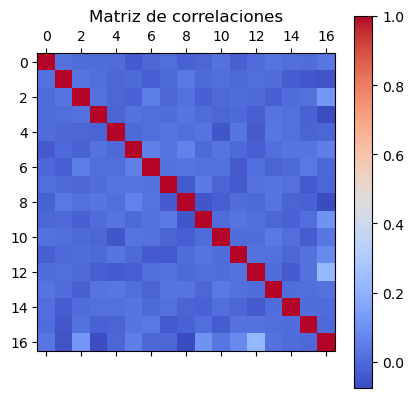

In [10]:
# Mediante un mapa de calor analizamos la matriz de correlación donde los colores van de azul a rojo, dependiendo del grado de correlación entre variables
plt.matshow(bullying.corr(), cmap="coolwarm")
# Añadimos el título "Matriz de correlaciones"
plt.title("Matriz de correlaciones")
# Añadimos una barra de color como leyenda
plt.colorbar()
# Mostramos la gráfica
plt.show()


Podemos ver cómo el mapa de calor solo muestra colores fríos y ningún color cálido, lo que indica que no hay mucha dependencia entre variables, y por lo tanto, no eliminaremos ninguna columna según sus correlaciones.

# Estrategias de validación y evaluación

Para la evaluación tendremos un modelo simple, Decision Tree, y dos modelos ensamble, Random Forest y AdaBoost (formado con árboles de decisión). Dividiremos nuestro dataset en train y test, con 80% y 20% respectivamente. Luego analizaremos su fiabilidad analizando con validación cruzada con cv = 5 a partir de los datos train, y luego finalizaremos analizando su overfitting de cada modelo, para saber si el modelo ha sobreentrenado o no.

Para ello utilizaremos dos funciones auxiliares que nos ayudarán con estos análisis: obtencion_metricas_clasificacion y print_scores.


* obtencion_metricas_clasificacion(Entradas, modelo, Salidas_verdaderas): En esta función pasaremos el conjunto de datos test sin sus etiquetas, nuestro modelo ya entrenado, y las etiquetas del conjunto test. Esta función nos retornará e imprimirá en pantalla, la exactitud, precision, sensibilidad y f1 de cada modelo.

In [11]:
# Importamos la clase matriz confusión 
# Importación de los métodos requeridos
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Importante poner para que se muestren los gráficos
%matplotlib inline
# Definimos una función para utilizarla posteriormente

def obtencion_metricas_clasificacion(Entradas, modelo, Salidas_verdaderas):
    '''Obtención de las métricas de clasificación'''
    # Salidas predichas por el modelo y las salidas verdaderas
    Salidas_predichas = modelo.predict(Entradas)
    # Matriz de confusión para visualizar aciertos y errores, ordenada primero con los falsos y segundo con los verdaderos
    labels = [False, True]
    matriz_confusion = confusion_matrix(Salidas_verdaderas, Salidas_predichas, labels=labels)
    print("La matriz de confusión es:")
    print(matriz_confusion)

    # Métricas que analizaremos en nuestros modelos
    exactitud = accuracy_score(Salidas_verdaderas, Salidas_predichas)
    precision = precision_score(Salidas_verdaderas, Salidas_predichas)
    sensibilidad_recall = recall_score(Salidas_verdaderas, Salidas_predichas)
    puntuacion_f1 = f1_score(Salidas_verdaderas, Salidas_predichas)

    # Cantidad de decimales que tendrá cada impresión
    digitos = 4
    print("La exactitud es: ")
    print(round(exactitud,digitos))
    print("La precisión es:")
    print(round(precision,digitos))
    print("La sensibilidad es:")
    print(round(sensibilidad_recall,digitos))
    print("La puntuación F1 es:")
    print(round(puntuacion_f1,digitos))

    return exactitud, precision, sensibilidad_recall, puntuacion_f1


* print_scores(scores, digitos=4): utilizaremos esta función para imprimir la media de los valores que nos devuelve el diccionario de cross_validate, función que utilizamos para analizar la validación cruzada de nuestros modelos. El parámetro scores es el diccionario y dígitos es la cantidad de números que queremos imprimir, redondeado a la última cifra.

In [12]:
def print_scores(scores, digitos=4):
        print("La exactitud media es:", round(scores['test_accuracy'].mean(), digitos), "con desviación típica media de:", round(np.std(scores['test_accuracy']), digitos))
        print("La precisión media es:", round(scores['test_precision'].mean(), digitos), "con desviación típica media de:", round(np.std(scores['test_precision']), digitos))
        print("La sensibilidad media es:", round(scores['test_recall'].mean(), digitos), "con desviación típica media de:", round(np.std(scores['test_recall']), digitos))
        print("La puntuación F1 media es:", round(scores['test_f1'].mean(), digitos), "con desviación típica media de:", round(np.std(scores['test_f1']), digitos))

Para analizar la fiabilidad de los modelos sin ser tan dependientes de la semilla utilizaremos validación cruzada.

Por ello, haremos la validación cruzada de nuestros 3 modelos, ya que hará divisiones en k folds, de las cuales estas estarán divididas en train y validación (aunque lo utilizaremos como test en este caso) en cada iteración, haciendo que haya más variedad en entrenamiento y predicción en los modelos. Pero hay que tener en cuenta que lo realizaremos con el conjunto training. Esto lo haremos para ver la fiabilidad que tienen nuestros modelos con respecto al preprocesado realizado.

Para analizar los resultados, lo haremos centrándonos en la media de la sensibilidad y la media de la desviación típica (importante para saber la fiabilidad del modelo). Hemos elegido centrarnos en la sensibilidad para priorizar la reducción de falsos negativos, es decir predecir que un alumno no sufre bullying cuando en realidad sí lo sufre. El perjuicio que se puede causar cuando se predice un falso negativo puede ser un error grave. Es por esto que hemos elegido esa métrica, aunque también analizaremos otras durante el experimento como son la exactitud, la precisión o la f1-score.

Para medir el *overfitting*, usaremos también una función auxiliar "print_overfitting", a la que le pasamos el resultado de la validación cruzada (diccionario) entrenada con training y lo restamos con el test predicho del modelo que hemos entrenado, que será el mismo modelo en ambos casos. De esta manera, si esta función nos devuelve valores negativos, podremos concluir que no habrá overfitting, y cuanto más grande sea el valor positivo que nos devuelva, más overfitting habrá en nuestro modelo.

In [13]:
def print_overfitting(scores_val, scores_test, digitos=4):
    print("El overfitting en la exactitud es:", round(scores_val['test_accuracy'].mean() - scores_test[0], digitos))
    print("El overfitting en la precision es:", round(scores_val['test_precision'].mean() - scores_test[1], digitos))
    print("El overfitting en la sensibilidad es:", round(scores_val['test_recall'].mean() - scores_test[2], digitos))
    print("El overfitting en la f1 es:", round(scores_val['test_f1'].mean() - scores_test[3], digitos))

# Modelos línea base <a name="modelos-linea-base"></a>

Puesto que hemos hecho los arreglos básicos para que los modelos no tengan problemas a la hora de ser entrenados con el dataset, decidimos proceder con el entrenamiento. Procesos como la eliminación de *outliers* y la selección de características decidimos abordarlas después para así saber si realmente mejoran el modelo o no. Esto se debe a que, en algunos casos, algunas características u *outliers* podrían beneficiarnos más que perjudicarnos.

In [14]:
#Importamos varias librerias que podrían ayudarnos a la hora de seguir con nuestros modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedStratifiedKFold
#Dividimos en "X" todas las columnas menos la variable objetivo, y en "y" la característica objetivo
X=bullying.drop("Sufre_Bullying_Si", axis=1)
y=bullying["Sufre_Bullying_Si"]
# Dividimos en train(80%) y test(20%) con la semilla establecida desde el principio, para tener una reproducción fija para mejorar nuestros modelos, además de stratify para que se haga una división lo más "balanceada" posible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=semilla, stratify=y)

Sobre lo que imprime esta función nos centraremos sobre todo en la matriz de confusión, ya que aporta mucha información de cómo funciona el modelo sobre los datos. Además de que la métrica prioritaria será para nosotros la sensibilidad, puesto que se nos pide como objetivo pelear contra el bullying, por lo tanto el peor caso es que se prediga que los estudiantes no sufren bullying, y en realidad sí que lo sufran. Para ello, la sensibilidad al estar influenciada inversamente por los Falsos Negativos, buscaremos maximizarla, buscando así los verdaderos positivos.

## Decision Tree <a name="decision-tree"></a>

Utilizamos árboles de decisión porque son unos de los modelos más interepretables, ya que su estructura basada en reglas permite visualizar con facilidad cómo el modelo toma sus decisiones, facilitando su análisis de comportamiento y el ajuste de hiperparámetros para mejorar su rendimiento. Es un modelo intuitivo y que además no requiere de normalización u otras técnicas que puedan cambiar la distribución intuitiva que tienen las características actualmente. Esto nos puede ayudar a la hora de explicar los modelos o visualizar las reglas si fuera necesario.

In [15]:
# Importamos la librería del árbol de decisiones, más específicamente, la parte del clasificador
from sklearn.tree import DecisionTreeClassifier
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Entrenamos el árbol de decisión utilizando el fit, con las variables X_train, que contiene todas las columnas excepto la objetivo, e y_train, que contiene las etiquietas de esos datos
treeC.fit(X_train, y_train)
# Imprimimos la profundidad del árbol de decisiones
print(f"Profundidad del árbol: {treeC.get_depth()}")
# Analizamos el número de nodos terminales
print(f"Número de nodos terminales: {treeC.get_n_leaves()}")

Profundidad del árbol: 15
Número de nodos terminales: 160


In [16]:
# Analizamos los resultados del modelo de árbol de decisiones con el conjunto de datos test y sus etiquetas
scoresDTBasico = obtencion_metricas_clasificacion(X_test, treeC, y_test)

La matriz de confusión es:
[[225  34]
 [ 34 107]]
La exactitud es: 
0.83
La precisión es:
0.7589
La sensibilidad es:
0.7589
La puntuación F1 es:
0.7589


Estos resultados son muy interesantes. Si nos centramos en la matriz de confusión podemos ver cómo, primero, hay un desbalanceo de los datos, puesto que hay 259 valores reales con "no bullying" (suma de "no" reales) a diferencia de los 141 que son "si bullying" (suma de "si" reales), los cuales deberemos corregir.

Además, dado que queremos combatir contra el bullying, deberemos tener en cuenta que los 34 Falsos Negativos(se predijo que 34 alumnos no sufren bullying, pero en realidad si lo sufren), que componen un 8.5% de los resultados, son los datos más importantes y que debemos buscar la forma de reducirlos.

Para terminar, su sensibilidad es del 75.89%, que buscaremos maximizar.

In [17]:
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(treeC, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8206 con desviación típica media de: 0.0165
La precisión media es: 0.7585 con desviación típica media de: 0.0178
La sensibilidad media es: 0.7193 con desviación típica media de: 0.0527
La puntuación F1 media es: 0.7375 con desviación típica media de: 0.0312


In [18]:
print_overfitting(scores, scoresDTBasico)

El overfitting en la exactitud es: -0.0094
El overfitting en la precision es: -0.0004
El overfitting en la sensibilidad es: -0.0396
El overfitting en la f1 es: -0.0214


## Random Forest <a name="random-forest"></a>

Utilizaremos Random Forest puesto que es un ensamble de tipo Bagging que utiliza varios árboles de decisión.

Cada árbol de decisión entrenará con un subconjunto aleatorio del conjunto de datos de entrenamiento, pudiendose repetir valores o no (Bootstrap).

Cada uno de los árboles que forma el bosque, funciona de forma independiente, pero luego junta su valor con el resto de árboles, y entonces eligen entre todos el valor que más se repite entre todos (agregación).

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Entrenamos Random Forest con los datos de entrenamiento y sus etiquetas
rf.fit(X_train, y_train)

# Analizamos los resultados de Random Forest con el conjunto de datos test y sus etiquetas
scoresRFBasico = obtencion_metricas_clasificacion(X_test, rf, y_test)

La matriz de confusión es:
[[232  27]
 [ 42  99]]
La exactitud es: 
0.8275
La precisión es:
0.7857
La sensibilidad es:
0.7021
La puntuación F1 es:
0.7416


Como primera aproximación, podemos ver cómo Random Forest, pese a ser un conjunto de árboles de decisiones, funciona peor que un árbol de decisión, ya que podemos ver que el número de estudiantes que sufren bullying y nuestro modelo ha predicho que "no" ha aumentado en 8 estudiantes más, lo cual es lo que intentamos evitar en todo momento.

Podemos ver cómo la sensibilidad es bastante inferior a la del árbol de decisión, bajando de un 75.89% a un 70.21%, haciendo así que no sea muy buen modelo, de momento, para nuestro dataset.

In [20]:
# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(rf, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8219 con desviación típica media de: 0.0149
La precisión media es: 0.7697 con desviación típica media de: 0.0261
La sensibilidad media es: 0.7067 con desviación típica media de: 0.0581
La puntuación F1 media es: 0.7352 con desviación típica media de: 0.0304


In [21]:
print_overfitting(scores, scoresRFBasico)

El overfitting en la exactitud es: -0.0056
El overfitting en la precision es: -0.016
El overfitting en la sensibilidad es: 0.0046
El overfitting en la f1 es: -0.0064


## AdaBoost <a name="adaboost"></a>

Adaboost es un ensamble del tipo sucesivo, el cual ejecuta un modelo simple y, a partir de las muestras clasificadas de forma errónea, se ejecuta otro modelo igual. En este proceso, la importancia de los errores dependerá del "learning_rate" y el número de modelos que ejecutarán el dataset dependerá del "n_estimators".

Para este caso, hemos elegido construir el AdaBoost con el árbol de decisiones que hemos creado antes, porque nos resulta interesante ver cómo cambia el valor al ejecutar el ensamble con respecto al modelo original.

In [22]:
from sklearn.ensemble import AdaBoostClassifier
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Entrenamos Adaboost con los datos de entrenamiento y sus etiquetas
adaboost.fit(X_train, y_train)

# Evaluamos Adaboost con el conjunto de datos test y sus etiquetas
scoresAdaBasico = obtencion_metricas_clasificacion(X_test, adaboost, y_test)

La matriz de confusión es:
[[222  37]
 [ 34 107]]
La exactitud es: 
0.8225
La precisión es:
0.7431
La sensibilidad es:
0.7589
La puntuación F1 es:
0.7509


Podemos ver cómo Adaboost con el árbol de decisiones creado anteriormente da resultados similares o un poco inferiores al modelo original. Es importante destacar que, en esta etapa, estamos utilizando valores por defecto porque queremos tener modelos base que nos sirvan para saber que si seguimos tocando datos, lo estamos mejorando o empeorando. Por ello, no hemos hecho ninguna búsqueda de hiperparámetros, o validación cruzada.

Su sensibilidad es la misma que la del árbol de decisiones, un 75.89%, un resultado que intentaremos maximizar junto al resto de nuestros modelos.

In [23]:
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(adaboost, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8244 con desviación típica media de: 0.015
La precisión media es: 0.7701 con desviación típica media de: 0.0114
La sensibilidad media es: 0.714 con desviación típica media de: 0.052
La puntuación F1 media es: 0.7401 con desviación típica media de: 0.0292


In [24]:
print_overfitting(scores, scoresAdaBasico)

El overfitting en la exactitud es: 0.0019
El overfitting en la precision es: 0.0271
El overfitting en la sensibilidad es: -0.0448
El overfitting en la f1 es: -0.0108


# Estrategias de preprocesado avanzado <a name="estrategias-de-preprocesado-avanzado"></a>

Una vez obtenidos los resultados, vamos a revisar y eliminar los *outliers*, hacer selección de características y por último, hacer balanceo de datos, ya que por lo que hemos visto, hay un desbalanceo considerable en la variable objetivo.

## Valores atípicos <a name="valores-atípicos"></a>

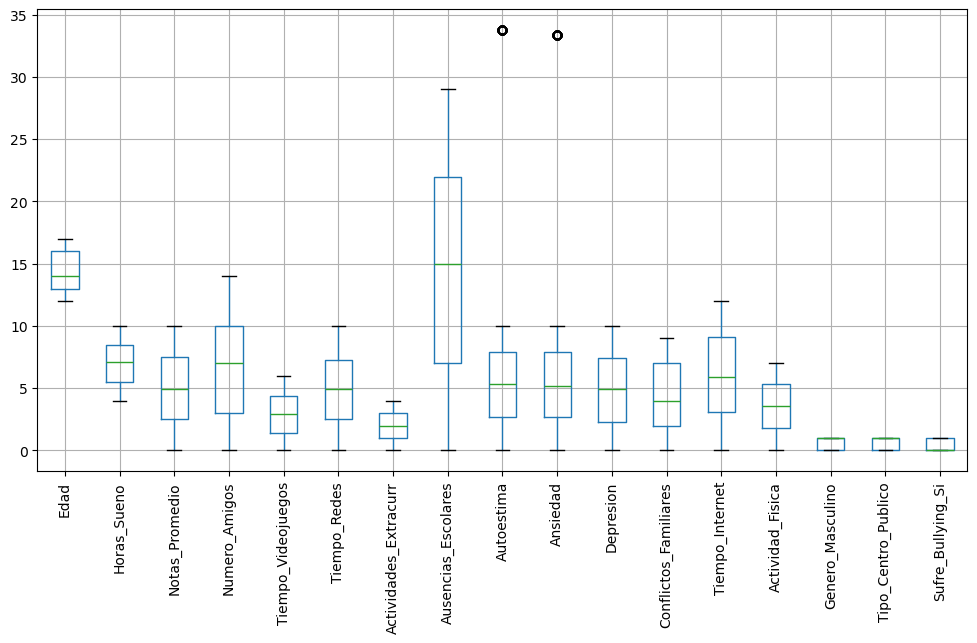

In [25]:
# Aumenta el tamaño del boxplot de la figura
bullying.boxplot(figsize=(12,6))
# Rotamos los nombres en el eje x a 90º
plt.xticks(rotation=90)
# Muestra la gráfica
plt.show()

Aunque en el boxplot podemos visualizar dos *outliers*, uno en la columna "Autoestima" y otro en la columna "Ansiedad", en realidad si vemos la base de datos, podemos ver cómo en realidad hay 100 outliers en cada columna, haciendo que al coincidir los valores sólo se vean como dos en el boxplot.

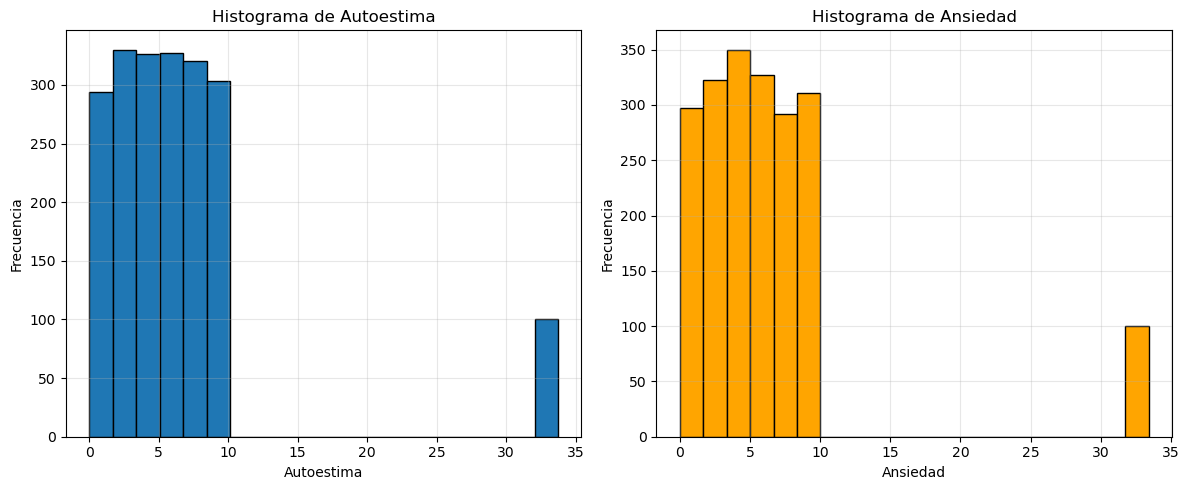

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Histograma de Autoestima
plt.subplot(1,2,1)
plt.hist(bullying['Autoestima'], bins=20, edgecolor='black')
plt.title("Histograma de Autoestima")
plt.xlabel("Autoestima")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)

# Histograma de Ansiedad
plt.subplot(1,2,2)
plt.hist(bullying['Ansiedad'], bins=20, edgecolor='black', color='orange')
plt.title("Histograma de Ansiedad")
plt.xlabel("Ansiedad")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Como se muestra en los histogramas, hay un valor que se sale de lo esperado. Mirando el dataset, podemos comprobar que para Autoestima el valor es "33.557282403870644" en los 100 datos en los que aparece, y para Ansiedad es "33.97737557364086". Estos datos parecen erróneos. Idealmente contactaríamos con la consejería para aclarar este dato. Parece claramente que no debería de estar en nuestro dataset, podría representar nulos o podría representar el valor 10. Vamos a tratarlos como nulos e imputarlos con la mediana, que como indicamos anteriormente, es el valor más fiable. Esto podría incluir un sesgo si luego esos datos fuesen en realidad valores muy distintos a la mediana. Tambien podríamos imputarlos con la mediana por clase, pero consideramos que esto introduciría un sesgo aún mayor, ya que estas variables presentan distribuciones con centros distintos entre clase, y daría pie a los modelos a usar directamente ese valor para clasificarlas en una clase u otra. Intentamos, por tanto, que los modelos deban de utilizar otras características junto con la `Autoestima` y la `Ansiedad` y no se fijen sólo en qué valores tienen en esas columnas.

In [27]:
# Marcamos como NaN los valores que estén entre 30 y 35
bullying.loc[bullying['Autoestima'].between(30, 35), 'Autoestima'] = np.nan
bullying.loc[bullying['Ansiedad'].between(30, 35), 'Ansiedad'] = np.nan

# Creamos el imputador
imputer = SimpleImputer(strategy="median")

# Aplicamos a ambas columnas a la vez
bullying[['Autoestima', 'Ansiedad']] = imputer.fit_transform(bullying[['Autoestima', 'Ansiedad']])


Convertimos todos los valores entre 30 y 35 de estas dos columnas (*outliers*), a través de la mediana.

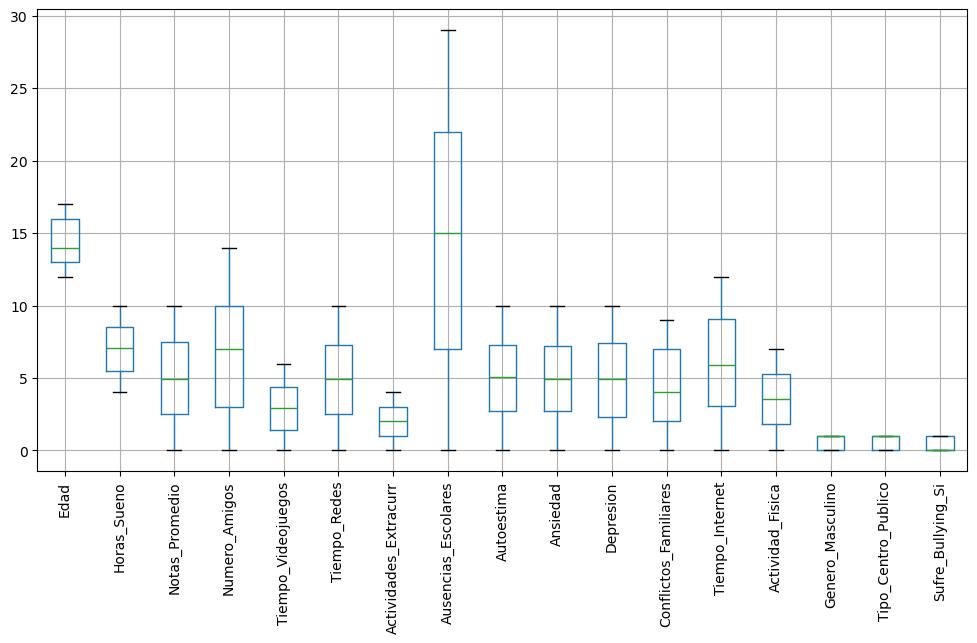

In [28]:
# Aumenta el tamaño del boxplot de la figura
bullying.boxplot(figsize=(12,6))
# Rotamos los nombres en el eje x a 90º
plt.xticks(rotation=90)
# Muestra la gráfica
plt.show()

Vemos cómo hemos sustituido los outliers por la mediana, por lo que ya no hay datos atípicos.

# Entrenamiento con preprocesado <a name="entrenamiento-con-preprocesado"></a>

Después de aplicar la selección de características, nuestros modelos deberían de mejorar sus resultados, puesto que al haber menos datos inútiles, se reduce el sobreajuste al haber menos complejidad en los datos, al mejorar sus predicciones y al no sobreaprender.

Hacemos la misma división con la misma semilla, para que no haya dudas de los resultados.

In [29]:
#Importamos varias librerias que podrían ayudarnos a la hora de seguir con nuestros modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedStratifiedKFold
#Dividimos en "X" todas las columnas menos la variable objetivo, y en "y" la característica objetivo
X=bullying.drop("Sufre_Bullying_Si", axis=1)
y=bullying["Sufre_Bullying_Si"]
# Dividimos en train(80%) y test(20%) con la semilla establecida desde el principio, para tener una reproducción fija para mejorar nuestros modelos, además de stratify para que se haga una división lo más "balanceada" posible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=semilla, stratify=y)

## Decision Tree <a name="decision-tree-1"></a>

Utilizamos el mismo árbol de decisiones que antes.

In [30]:
# Importamos la librería del árbol de decisiones, más específicamente, la parte del clasificador
from sklearn.tree import DecisionTreeClassifier
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Entrenamos el árbol de decisión utilizando el fit, con las variables X_train, que contiene todas las columnas excepto la objetivo, e y_train, que contiene las etiquietas de esos datos
treeC.fit(X_train, y_train)
# Imprimimos la profundidad del árbol de decisiones
print(f"Profundidad del árbol: {treeC.get_depth()}")
# Analizamos el número de nodos terminales
print(f"Número de nodos terminales: {treeC.get_n_leaves()}")

Profundidad del árbol: 15
Número de nodos terminales: 164


Podemos ver cómo ha habido un cambio mínimo en el número de nodos terminales.

In [31]:
# Analizamos los resultados del modelo de árbol de decisiones con el conjunto de datos test y sus etiquetas
scoresDTOutliers = obtencion_metricas_clasificacion(X_test, treeC, y_test)

La matriz de confusión es:
[[224  35]
 [ 33 108]]
La exactitud es: 
0.83
La precisión es:
0.7552
La sensibilidad es:
0.766
La puntuación F1 es:
0.7606


Si comparamos los resultados con el anterior Decision Tree, pese a que la única diferencia ha sido la selección de datos, ha habido una ligera mejora. En la matriz de confusión, que ahora en vez de 34 alumnos que predicía como que no sufrían bullying, cuando en realidad lo sufren, ha pasado a 33.

La sensibilidad también ha mejorado a un 76.60%. 

In [32]:
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(treeC, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8238 con desviación típica media de: 0.0239
La precisión media es: 0.7496 con desviación típica media de: 0.0252
La sensibilidad media es: 0.7477 con desviación típica media de: 0.0562
La puntuación F1 media es: 0.7482 con desviación típica media de: 0.0396


In [33]:
print_overfitting(scores, scoresDTOutliers)

El overfitting en la exactitud es: -0.0062
El overfitting en la precision es: -0.0057
El overfitting en la sensibilidad es: -0.0183
El overfitting en la f1 es: -0.0124


## Random Forest <a name="random-forest-1"></a>

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Entrenamos Random Forest con los datos de entrenamiento y sus etiquetas
rf.fit(X_train, y_train)

# Analizamos los resultados de Random Forest con el conjunto de datos test y sus etiquetas
scoresRFOutliers = obtencion_metricas_clasificacion(X_test, rf, y_test)

La matriz de confusión es:
[[225  34]
 [ 35 106]]
La exactitud es: 
0.8275
La precisión es:
0.7571
La sensibilidad es:
0.7518
La puntuación F1 es:
0.7544


Podemos ver como en el caso de Random Forest, los resultados han mejorado ligeramente con respecto al modelo original, pasando de 42 FN a 35, y la sensibilidad que antes tenía un valor de 70.21% ha pasado a 75.18%.

Este modelo parece peor que el modelo Decision Tree según los resultados obtenidos.

In [35]:
# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(rf, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8169 con desviación típica media de: 0.0174
La precisión media es: 0.7595 con desviación típica media de: 0.024
La sensibilidad media es: 0.7033 con desviación típica media de: 0.0595
La puntuación F1 media es: 0.7288 con desviación típica media de: 0.0325


In [36]:
print_overfitting(scores, scoresRFOutliers)

El overfitting en la exactitud es: -0.0106
El overfitting en la precision es: 0.0023
El overfitting en la sensibilidad es: -0.0485
El overfitting en la f1 es: -0.0256


## AdaBoost <a name="adaboost-1"></a>

In [37]:
from sklearn.ensemble import AdaBoostClassifier
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Entrenamos Adaboost con los datos de entrenamiento y sus etiquetas
adaboost.fit(X_train, y_train)

# Evaluamos Adaboost con el conjunto de datos test y sus etiquetas
scoresAdaOutliers = obtencion_metricas_clasificacion(X_test, adaboost, y_test)

La matriz de confusión es:
[[225  34]
 [ 38 103]]
La exactitud es: 
0.82
La precisión es:
0.7518
La sensibilidad es:
0.7305
La puntuación F1 es:
0.741


Aquí podemos ver como AdaBoost ha empeorado con respecto a su uso anterior, puesto que ha pasado de 34 Falsos Negativos a 38, haciendo así que su sensibilidad ha pasado de un 75.09% a un 73.05%

In [38]:
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(adaboost, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8256 con desviación típica media de: 0.0225
La precisión media es: 0.7512 con desviación típica media de: 0.0269
La sensibilidad media es: 0.753 con desviación típica media de: 0.0445
La puntuación F1 media es: 0.752 con desviación típica media de: 0.0349


In [39]:
print_overfitting(scores, scoresAdaOutliers)

El overfitting en la exactitud es: 0.0056
El overfitting en la precision es: -0.0006
El overfitting en la sensibilidad es: 0.0225
El overfitting en la f1 es: 0.011


# Selección de características

Realizaremos una selección de características para saber si hay columnas que no sólo no aportan nada a nuestros modelos, sino que incluso introducen ruido, que hace que los modelos aprendan cosas incorrectas y sus predicciones empeoren.

Para ello, lo primero que haremos es mirar la correlación que tienen nuestras variables con respecto a nuestra variable objetivo "Sufre_Bulling_Si", ya que como vimos anteriormente en la varianza, hay 2 variables, "Tipo_Centro_Publico" y "Genero_Masculino", que tienen varianza muy cercana a 0, y vamos a analizar sus valores además del resto de características.

In [40]:
# Hacemos una matriz de correlación y visualizaremos sobre nuestra columna objetivo cuáles columnas parecen ser la más influyentes 
matriz_correlacion = bullying.corr()
# Visualizaremos de mayor a menor
matriz_correlacion["Sufre_Bullying_Si"].sort_values(ascending=False)

Sufre_Bullying_Si        1.000000
Ansiedad                 0.330236
Tiempo_Internet          0.222116
Notas_Promedio           0.118079
Conflictos_Familiares    0.081554
Tiempo_Redes             0.052044
Depresion                0.032933
Edad                     0.029757
Actividad_Fisica         0.019360
Genero_Masculino         0.002479
Tipo_Centro_Publico     -0.002061
Actividades_Extracurr   -0.005985
Tiempo_Videojuegos      -0.010141
Ausencias_Escolares     -0.012196
Horas_Sueno             -0.053791
Numero_Amigos           -0.069401
Autoestima              -0.162548
Name: Sufre_Bullying_Si, dtype: float64

En la correlación se puede ver las variables que más influyen y las que menos en la variable objetivo, las ordenaremos de mayor a menor: "Ansiedad", "Tiempo_Internet", "Autoestima", "Notas_Promedio", "Conflictos_Familiares", "Numero_amigos", "Horas_Sueno", "Tiempo_Redes", "Depresion", "Edad", "Actividad_Fisica", "Ausencias_escolares", "Tiempo_Videojuegos", "Actividades_Extracurr", "Genero_Masculino", "Tipo_Centro_Publico".

Por lo tanto podemos confirmar una vez más, que las variables "Genero_Masculino" y "Tipo_Centro_Publico" parece que no ayudan a nuestros modelos. Además, se puede ver otra variable que tampoco aporta nada, la variable "Actividades_Extracurr", para ello vamos a ver unos histogramas para ver como están distribuidos los valores en estas 3 variables.

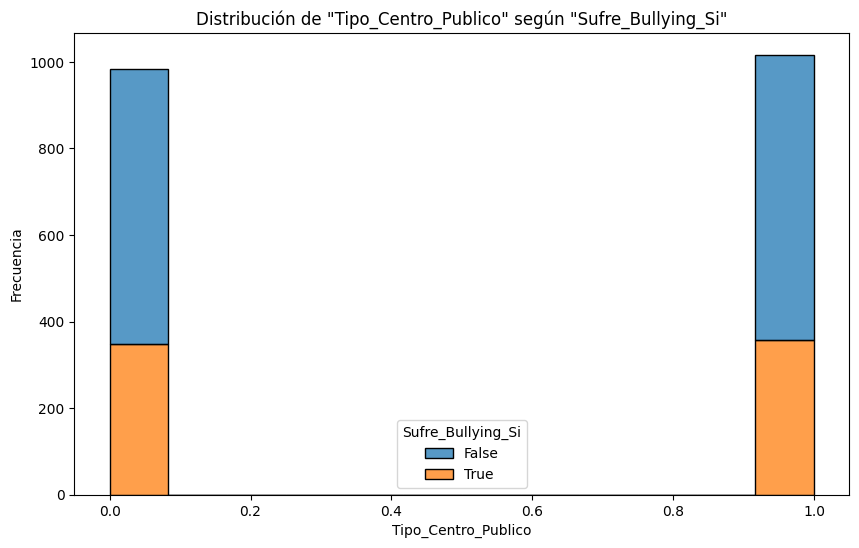

In [41]:
import seaborn as sns

# Creamos el histograma
plt.figure(figsize=(10,6))
sns.histplot(data=bullying, x='Tipo_Centro_Publico', hue='Sufre_Bullying_Si', multiple='stack', kde=False)
plt.title('Distribución de "Tipo_Centro_Publico" según "Sufre_Bullying_Si"')
plt.xlabel('Tipo_Centro_Publico')
plt.ylabel('Frecuencia')
plt.show()

Viendo el histograma de la variable "Tipo_Centro_Publico" con respecto a la variable objetivo "Sufre_Bullying_Si" podemos ver como los dos tipos de centro, publico y privado, disponen de una distribución muy similares en falsos y aciertos, casi en la misma cantidad de datos. Por lo tanto, vemos cómo esta variable, una vez más, parece completamente inútil, o incluso perjudicial (ruido) para nuestros modelos.

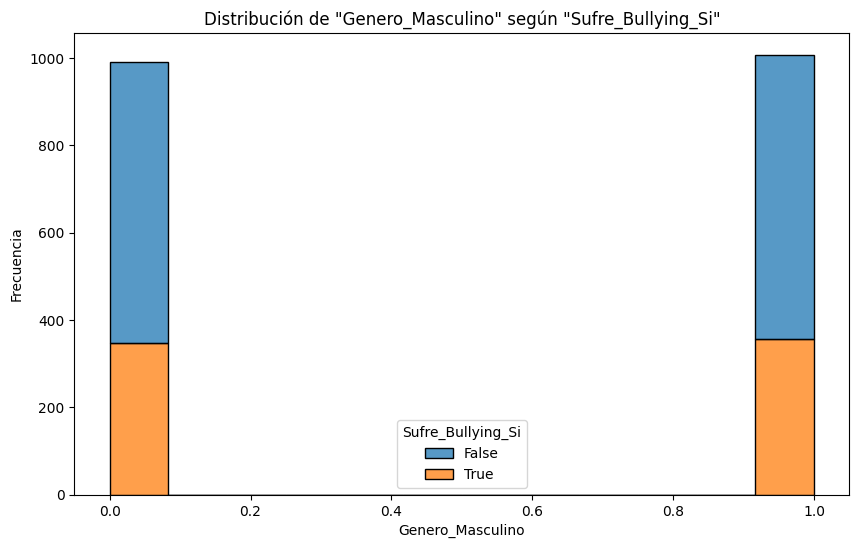

In [42]:
import seaborn as sns

# Creamos el histograma
plt.figure(figsize=(10,6))
sns.histplot(data=bullying, x='Genero_Masculino', hue='Sufre_Bullying_Si', multiple='stack', kde=False)
plt.title('Distribución de "Genero_Masculino" según "Sufre_Bullying_Si"')
plt.xlabel('Genero_Masculino')
plt.ylabel('Frecuencia')
plt.show()

Viendo el histograma de la variable "Genero_Masculino" con respecto a la variable objetivo "Sufre_Bullying_si" vemos, como sucede en el histograma anterior, que sucede algo muy parecido, misma distribución de datos en las dos variables de Genero_Masculino. Por lo tanto, como sucede antes, esta variable una vez más demuestra lo inútil o inluso perjudicial (ruido) que puede ser para nuestros modelos.

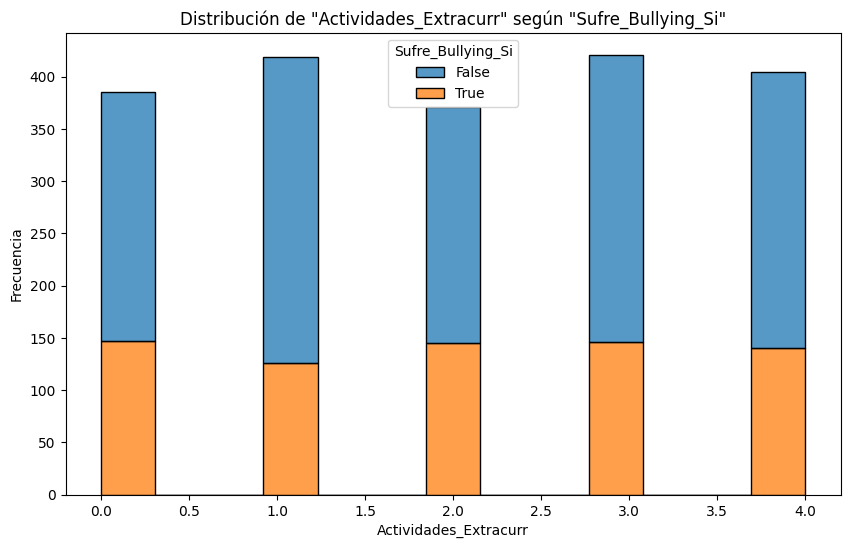

In [43]:
import seaborn as sns

# Creamos el histograma
plt.figure(figsize=(10,6))
sns.histplot(data=bullying, x='Actividades_Extracurr', hue='Sufre_Bullying_Si', multiple='stack', kde=False)
plt.title('Distribución de "Actividades_Extracurr" según "Sufre_Bullying_Si"')
plt.xlabel('Actividades_Extracurr')
plt.ylabel('Frecuencia')
plt.show()

En cuanto a la variable "Actividades Extracurr" con respecto a la variable objetivo "Sufre_Bullying_Si", podemos ver cómo sucede algo similar a las anteriores dos variables analizadas, en cada uno de los valores de esta variable (5), se puede ver como hay una distribución similar de datos en cada uno de los valores. Por lo tanto, al igual que antes, poedemos ver que parece ser completamente innecesario para nuestros modelos.

Ahora vamos a analizar cómo funcionan nuestras características utilizando una eliminacion recursiva de características (RFE), en la cual se entrenará el modelo, en este caso Random Forest, con todas las variables, y se calculará su importancia. Una vez calculada, esta técnica elimina la que considera menos importante, y vuelve a entrenar sin la variable eliminada, continuando hasta que se quede con una sola variable.

Características: 1, Sensibilidad: 0.4530, Exactitud: 0.6817
Características: 2, Sensibilidad: 0.5045, Exactitud: 0.6746
Características: 3, Sensibilidad: 0.5956, Exactitud: 0.7592
Características: 4, Sensibilidad: 0.5885, Exactitud: 0.7429
Características: 5, Sensibilidad: 0.6513, Exactitud: 0.7742
Características: 6, Sensibilidad: 0.6885, Exactitud: 0.8035
Características: 7, Sensibilidad: 0.7164, Exactitud: 0.8127
Características: 8, Sensibilidad: 0.7672, Exactitud: 0.8325
Características: 9, Sensibilidad: 0.8312, Exactitud: 0.8525
Características: 10, Sensibilidad: 0.8206, Exactitud: 0.8496
Características: 11, Sensibilidad: 0.8028, Exactitud: 0.8446
Características: 12, Sensibilidad: 0.7998, Exactitud: 0.8462
Características: 13, Sensibilidad: 0.7691, Exactitud: 0.8371
Características: 14, Sensibilidad: 0.7436, Exactitud: 0.8281
Características: 15, Sensibilidad: 0.7140, Exactitud: 0.8204
Características: 16, Sensibilidad: 0.7869, Exactitud: 0.8427


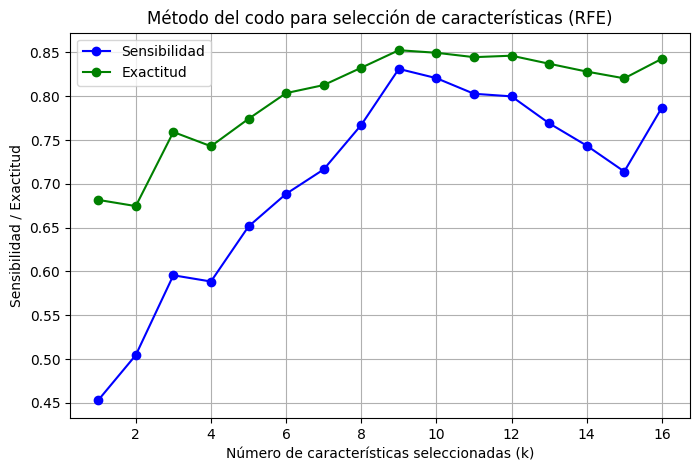

In [44]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

resultados_recall = []
resultados_accuracy = []
num_features = []

# Número total de características
total_features = X_train.shape[1]

# Evaluamos desde 1 hasta todas las características
for k in range(1, total_features + 1):

    # RFE seleccionando k características
    rfe = RFE(RandomForestClassifier(random_state=semilla),
              n_features_to_select=k)

    # Pipeline: RFE + random forest
    model = RandomForestClassifier(random_state=semilla)
    pipeline = Pipeline([('rfe', rfe), ('model', model)])

    # Validación cruzada
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=semilla)
    scores = cross_validate(pipeline, X_train, y_train, scoring=['recall','accuracy'], cv=cv, n_jobs=-1)
    resultados_recall.append(np.mean(scores['test_recall']))
    resultados_accuracy.append(np.mean(scores['test_accuracy']))
    num_features.append(k)

    print(f"Características: {k}, Sensibilidad: {np.mean(scores['test_recall']):.4f}, Exactitud: {np.mean(scores['test_accuracy']):.4f}")
# --- Gráfica del método del codo ---
plt.figure(figsize=(8,5))
plt.plot(num_features, resultados_recall, color='blue', marker='o')
plt.plot(num_features, resultados_accuracy, color='green', marker='o')
plt.xlabel("Número de características seleccionadas (k)")
plt.ylabel("Sensibilidad / Exactitud")
plt.legend(["Sensibilidad", "Exactitud"])
plt.title("Método del codo para selección de características (RFE)")
plt.grid(True)
plt.show()

En la gráfica se puede ver cómo, tanto la sensibilidad como la exactitud, llegan su punto más alto cuando llegan a las 9 características más importantes según random forest, por lo tanto ahora procederemos a ver cuáles variables elimina.

In [45]:
n_features_to_select = 9
rfe = RFE(RandomForestClassifier(random_state=semilla), n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)


from operator import itemgetter
features = X_train.columns.to_list()
columns_selected = []
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    if x == 1:
        columns_selected.append(y)
    print(x, y)

1 Horas_Sueno
1 Notas_Promedio
1 Numero_Amigos
1 Tiempo_Redes
1 Autoestima
1 Ansiedad
1 Depresion
1 Conflictos_Familiares
1 Tiempo_Internet
2 Actividad_Fisica
3 Ausencias_Escolares
4 Tiempo_Videojuegos
5 Edad
6 Actividades_Extracurr
7 Genero_Masculino
8 Tipo_Centro_Publico


En este caso, vemos cómo ha eliminado 7 variables, entre las cuales las 3 primeras que ha descartado han sido las 3 variables que veníamos sospechando de la varianza (2) y en la tabla de correlación a la variable objetivo (3), y como luego hemos analizado según los 3 histogramas. Por tanto, decidimos hacer caso a esta técnica y nos quedamos con las 9 que ha considerados más importantes, además de la variable objetivo.

In [46]:
bullying_seleccion = bullying[columns_selected + ['Sufre_Bullying_Si']]
bullying_seleccion.head()

,Horas_Sueno,Notas_Promedio,Numero_Amigos,Tiempo_Redes,Autoestima,Ansiedad,Depresion,Conflictos_Familiares,Tiempo_Internet,Sufre_Bullying_Si
0,6.0,5.5,12.0,6.0,1.9,5.7,0.7,2,3.7,False
1,6.8,5.2,2.0,0.9,8.6,8.7,9.4,9,5.8,True
2,8.5,3.5,9.0,6.1,8.8,4.7,6.2,1,6.2,False
3,9.2,6.8,4.0,0.9,3.0,9.3,7.3,9,0.0,True
4,6.6,7.6,2.0,9.6,8.2,2.1,6.8,4,7.4,True


Aquí se puede ver como nos hemos quedado con 10 variables, 9 predictoras y 1 objetivo.

Ahora vamos a hacer nuestra división train y test (80% y 20% respectivamente) para hacer nuestros cálculos una vez aplicada la selección de características.

In [47]:
#Dividimos en "X" todas las columnas menos la variable objetivo, y en "y" la característica objetivo
X=bullying_seleccion.drop("Sufre_Bullying_Si", axis=1)
y=bullying_seleccion["Sufre_Bullying_Si"]
# Dividimos en train(80%) y test(20%) con la semilla establecida desde el principio, para tener una reproducción fija para mejorar nuestros modelos, además de stratify para que se haga una división lo más "balanceada" posible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=semilla, stratify=y)

# Entrenamiento de modelos con selección de características

Pasamos ahora a entrenar nuestros modelos tras haber aplicado selección de características sobre nuestros datos.

## Decision Tree

Entrenamos nuestro árbol de decisión.

In [48]:
# Importamos la librería del árbol de decisiones, más específicamente, la parte del clasificador
from sklearn.tree import DecisionTreeClassifier
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Entrenamos el árbol de decisión utilizando el fit, con las variables X_train, que contiene todas las columnas excepto la objetivo, e y_train, que contiene las etiquietas de esos datos
treeC.fit(X_train, y_train)
# Imprimimos la profundidad del árbol de decisiones
print(f"Profundidad del árbol: {treeC.get_depth()}")
# Analizamos el número de nodos terminales
print(f"Número de nodos terminales: {treeC.get_n_leaves()}")

Profundidad del árbol: 15
Número de nodos terminales: 181


In [49]:
# Analizamos los resultados del modelo de árbol de decisiones con el conjunto de datos test y sus etiquetas
scoresDTSeleccion = obtencion_metricas_clasificacion(X_test, treeC, y_test)

La matriz de confusión es:
[[227  32]
 [ 38 103]]
La exactitud es: 
0.825
La precisión es:
0.763
La sensibilidad es:
0.7305
La puntuación F1 es:
0.7464


Vemos las métricas del modelo.

In [50]:
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(treeC, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8125 con desviación típica media de: 0.019
La precisión media es: 0.7378 con desviación típica media de: 0.0293
La sensibilidad media es: 0.7265 con desviación típica media de: 0.052
La puntuación F1 media es: 0.731 con desviación típica media de: 0.0317


In [51]:
print_overfitting(scores, scoresDTSeleccion)

El overfitting en la exactitud es: -0.0125
El overfitting en la precision es: -0.0252
El overfitting en la sensibilidad es: -0.004
El overfitting en la f1 es: -0.0154


Vemos que apenas tenemos overfitting según nuestras métricas.

## Random Forest

Entrenamos el modelo Random Forest.

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Entrenamos Random Forest con los datos de entrenamiento y sus etiquetas
rf.fit(X_train, y_train)

# Analizamos los resultados de Random Forest con el conjunto de datos test y sus etiquetas
scoresRFSeleccion = obtencion_metricas_clasificacion(X_test, rf, y_test)

La matriz de confusión es:
[[222  37]
 [ 27 114]]
La exactitud es: 
0.84
La precisión es:
0.755
La sensibilidad es:
0.8085
La puntuación F1 es:
0.7808


Medimos las métricas del modelo.

In [53]:
# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(rf, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8412 con desviación típica media de: 0.0105
La precisión media es: 0.7663 con desviación típica media de: 0.0211
La sensibilidad media es: 0.792 con desviación típica media de: 0.0473
La puntuación F1 media es: 0.7778 con desviación típica media de: 0.0198


In [54]:
print_overfitting(scores, scoresRFSeleccion)

El overfitting en la exactitud es: 0.0012
El overfitting en la precision es: 0.0113
El overfitting en la sensibilidad es: -0.0165
El overfitting en la f1 es: -0.003


Vemos que apenas tenemos overfitting según nuestras métricas.

## AdaBoost

Entrenamos el modelo AdaBoost.

In [55]:
from sklearn.ensemble import AdaBoostClassifier
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Entrenamos Adaboost con los datos de entrenamiento y sus etiquetas
adaboost.fit(X_train, y_train)

# Evaluamos Adaboost con el conjunto de datos test y sus etiquetas
scoresAdaSeleccion = obtencion_metricas_clasificacion(X_test, adaboost, y_test)

La matriz de confusión es:
[[227  32]
 [ 37 104]]
La exactitud es: 
0.8275
La precisión es:
0.7647
La sensibilidad es:
0.7376
La puntuación F1 es:
0.7509


Calculamos las métricas del modelo.

In [56]:
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(adaboost, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8212 con desviación típica media de: 0.017
La precisión media es: 0.7538 con desviación típica media de: 0.0345
La sensibilidad media es: 0.7336 con desviación típica media de: 0.0259
La puntuación F1 media es: 0.743 con desviación típica media de: 0.0216


In [57]:
print_overfitting(scores, scoresAdaSeleccion)

El overfitting en la exactitud es: -0.0062
El overfitting en la precision es: -0.0109
El overfitting en la sensibilidad es: -0.004
El overfitting en la f1 es: -0.0079


Vemos que apenas tenemos overfitting según nuestras métricas.

# Balanceo de datos

Primero debemos confirmar si hay desbalanceo real, y saber de cuánta es la diferencia.

In [58]:
from collections import Counter

# Contamos los valores de cada clase de la variable objetivo
counter = Counter(bullying_seleccion["Sufre_Bullying_Si"])
print(counter)

Counter({False: 1296, True: 704})


Se puede ver que hay un ligero desbalanceo, de 64.8% para los falsos (que ya hemos ido viendo en las matrices de confusión de los modelos) y 35.2% para los verdaderos, para el dataset en general.

In [59]:
# Contamos los valores de cada clase de la variable objetivo
counter = Counter(y_train)
print(counter)

Counter({False: 1037, True: 563})


Como se puede ver, gracias al "stratify=y" en la división train y test, hemos ido conservando el balance de negativos y positivos de nuestro dataset, por lo tanto procederemos a solucionarlo.

Por lo tanto, aplicaremos dos métodos que aumenten la cantidad de datos de la clase minoritaria, y eligiremos el que mejor funcione.

Estos dos métodos son: Borderline-SMOTE y ADASYN.

* Borderline-SMOTE: Consiste en añadir instancias en las fronteras, es decir, en los lugares donde más le cuesta al algoritmo decidir si una instancia pertenece a una clase u otra.

* ADASYN: Crea instancias de la clase minoritaria en zonas donde hay pocas instancias de la misma, y muchas de la clase mayoritaria, reforzando así el aprendizaje de esas zonas.

In [60]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

# Creamos el objeto BorderlineSMOTE y ADASYN, estableciendo la semilla por reproducibilidad
oversample_bsmote = BorderlineSMOTE(random_state=semilla)
oversample_adasyn = ADASYN(random_state=semilla)

# hacemos el cálculo y cambiamos los datos en la parte training
X_train_bsmote, y_train_bsmote = oversample_bsmote.fit_resample(X_train, y_train)
X_train_adasyn, y_train_adasyn = oversample_adasyn.fit_resample(X_train, y_train)

# Imprimimos la cantidad de datos que pertenece a cada clase
counter_bsmote = Counter(y_train_bsmote)
print(counter_bsmote)
counter_adasyn = Counter(y_train_adasyn)
print(counter_adasyn)

Counter({False: 1037, True: 1037})
Counter({False: 1037, True: 1001})


BorderlineSMOTE nos ha ajustado los dos contadores a la perfección. En cambio, ADASYN nos ha incrementado la clase minoritaria hasta dejarla casi igual que la mayoritaria, seguramente sea porque la técnica crea instancias artificiales de la clase minoritaria en zonas donde hay muy pocas, por lo que cuando ha visto que ha realizado el proceso ha terminado, pero no nos supone ningún problema.

Como se puede ver, hemos creado: X_train_bsmote, y_train_bsmote, X_train_adasyn, y_train_adasyn.

Estos nuevos datos de entrenamiento, los utilizaremos en cada una de los 3 modelos donde probaremos la efectividad que tienen en cada uno de ellos, y elegiremos la técnica de balanceo que mejor funcione.

# Entrenamiento de modelos con balanceo de datos

Probaremos las dos técnicas de desbalanceo en cada uno de los 3 modelos

## Decision Tree

### Borderline-SMOTE

In [61]:
# Importamos la librería del árbol de decisiones, más específicamente, la parte del clasificador
from sklearn.tree import DecisionTreeClassifier
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Entrenamos el árbol de decisión utilizando el fit, con las variables X_train, que contiene todas las columnas excepto la objetivo, e y_train, que contiene las etiquietas de esos datos
treeC.fit(X_train_bsmote, y_train_bsmote)
# Imprimimos la profundidad del árbol de decisiones
print(f"Profundidad del árbol: {treeC.get_depth()}")
# Analizamos el número de nodos terminales
print(f"Número de nodos terminales: {treeC.get_n_leaves()}")

Profundidad del árbol: 17
Número de nodos terminales: 226


In [62]:
# Analizamos los resultados del modelo de árbol de decisiones con el conjunto de datos test y sus etiquetas
obtencion_metricas_clasificacion(X_test, treeC, y_test)

La matriz de confusión es:
[[214  45]
 [ 36 105]]
La exactitud es: 
0.7975
La precisión es:
0.7
La sensibilidad es:
0.7447
La puntuación F1 es:
0.7216


(0.7975, 0.7, 0.7446808510638298, 0.7216494845360825)

Con una sensibilidad del 74.47% vemos como hemos emepeorado un poco con respecto a cuando habiamos eliminado outliers, 76.6%, además de subir la tasa de FN de 33 a 36.

### ADASYN

In [63]:
# Importamos la librería del árbol de decisiones, más específicamente, la parte del clasificador
from sklearn.tree import DecisionTreeClassifier
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Entrenamos el árbol de decisión utilizando el fit, con las variables X_train, que contiene todas las columnas excepto la objetivo, e y_train, que contiene las etiquietas de esos datos
treeC.fit(X_train_adasyn, y_train_adasyn)
# Imprimimos la profundidad del árbol de decisiones
print(f"Profundidad del árbol: {treeC.get_depth()}")
# Analizamos el número de nodos terminales
print(f"Número de nodos terminales: {treeC.get_n_leaves()}")

Profundidad del árbol: 17
Número de nodos terminales: 225


In [64]:
# Analizamos los resultados del modelo de árbol de decisiones con el conjunto de datos test y sus etiquetas
scoresDTBalanceo = obtencion_metricas_clasificacion(X_test, treeC, y_test)

La matriz de confusión es:
[[222  37]
 [ 41 100]]
La exactitud es: 
0.805
La precisión es:
0.7299
La sensibilidad es:
0.7092
La puntuación F1 es:
0.7194


Con una sensibilidad del 70.92% ha disminuido incluso más que B-SMOTE y los FN han incrementado a 41, siendo la peor técnica de balanceo para este modelo.

## Random Forest

### Borderline-SMOTE

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Entrenamos Random Forest con los datos de entrenamiento y sus etiquetas
rf.fit(X_train_bsmote, y_train_bsmote)

# Analizamos los resultados de Random Forest con el conjunto de datos test y sus etiquetas
obtencion_metricas_clasificacion(X_test, rf, y_test)

La matriz de confusión es:
[[215  44]
 [ 19 122]]
La exactitud es: 
0.8425
La precisión es:
0.7349
La sensibilidad es:
0.8652
La puntuación F1 es:
0.7948


(0.8425, 0.7349397590361446, 0.8652482269503546, 0.7947882736156352)

De nuevo, vemos una gran mejoría con respecto a la anterior pasada, ha pasado de un 75.18% de sensibilidad a un 86.52%, haciendo así que haya sido una mejoría del 11.34%, haciéndolo de nuevo el mejor modelo, al menos mejor que DecisionTree (aún falta calcular el ADABOOST). Notar que el método que hemos utilizado aquí es el de Borderline-SMOTE, que antes funcionó mal con árboles de decisiones. También presenta una disminución de FN de 35 a 19, casi la mitad.

### ADASYN

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Entrenamos Random Forest con los datos de entrenamiento y sus etiquetas
rf.fit(X_train_adasyn, y_train_adasyn)

# Analizamos los resultados de Random Forest con el conjunto de datos test y sus etiquetas
scoresRFBalanceo = obtencion_metricas_clasificacion(X_test, rf, y_test)

La matriz de confusión es:
[[217  42]
 [ 13 128]]
La exactitud es: 
0.8625
La precisión es:
0.7529
La sensibilidad es:
0.9078
La puntuación F1 es:
0.8232


Aquí podemos ver, si lo comparamos con el aplicado a Borderline-SMOTE, mejora de nuevo, con una sensibilidad del 90.78%, y una disminución de FN a 13. Por lo tanto, se convierte en el mejor modelo, aplicando  ADASYN.

## AdaBoost

### Borderline-SMOTE

In [67]:
from sklearn.ensemble import AdaBoostClassifier
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Entrenamos Adaboost con los datos de entrenamiento y sus etiquetas
adaboost.fit(X_train_bsmote, y_train_bsmote)

# Evaluamos Adaboost con el conjunto de datos test y sus etiquetas
obtencion_metricas_clasificacion(X_test, adaboost, y_test)

La matriz de confusión es:
[[217  42]
 [ 32 109]]
La exactitud es: 
0.815
La precisión es:
0.7219
La sensibilidad es:
0.773
La puntuación F1 es:
0.7466


(0.815, 0.7218543046357616, 0.7730496453900709, 0.7465753424657534)

Aquí vemos como la sensibilidad de ADABOOST ha mejorado desde un 73.05% a un 77.3%, además de bajar los FN desde 38 a 32. Esto lo convierte en un mejor modelo que Decision Tree, en caso de que nos quedemos con esta técnica de balanceo, y un peor modelo que Random Forest en general.

### ADASYN

In [68]:
from sklearn.ensemble import AdaBoostClassifier
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Entrenamos Adaboost con los datos de entrenamiento y sus etiquetas
adaboost.fit(X_train_adasyn, y_train_adasyn)

# Evaluamos Adaboost con el conjunto de datos test y sus etiquetas
scoresAdaBalanceo = obtencion_metricas_clasificacion(X_test, adaboost, y_test)

La matriz de confusión es:
[[220  39]
 [ 40 101]]
La exactitud es: 
0.8025
La precisión es:
0.7214
La sensibilidad es:
0.7163
La puntuación F1 es:
0.7189


Aquí se ve una sensibilidad del 71.63% y en la matriz de confusión, 40 FN, haciéndolo, como sucede en B-SMOTE, mejor modelo que Decision Tree y peor que Random Forest. Vemos también, como sucede en Decision Tree, ADASYN funciona peor que B-SMOTE para este modelo.

Analizando las dos técnicas de desbalanceo en cada modelo:

ADASYN < Borderline-SMOTE en árbol de decisiones(Peor modelo en las dos técnicas).

ADASYN > Borderline-SMOTE en random forest (el mejor modelo hasta el momento).

ADASYN < Borderline-SMOTE en ADABOOST (ligeramente superior a Decision Tree).

Por lo tanto hemos pensado en utilizar ADASYN de forma definitiva, ya que Random Forest, nuestro mejor modelo hasta el momento, tiene una sensibilidad del 90.78% y una cantidad de FN de 13.

In [69]:
X_train = X_train_adasyn
y_train = y_train_adasyn

Ahora analizaremos el overfitting y validación cruzada sobre nuestros modelos entrenados sobre adasyn.

## Decision Tree

In [70]:
# Importamos la librería del árbol de decisiones, más específicamente, la parte del clasificador
from sklearn.tree import DecisionTreeClassifier
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Entrenamos el árbol de decisión utilizando el fit, con las variables X_train, que contiene todas las columnas excepto la objetivo, e y_train, que contiene las etiquietas de esos datos
treeC.fit(X_train, y_train)
# Imprimimos la profundidad del árbol de decisiones
print(f"Profundidad del árbol: {treeC.get_depth()}")
# Analizamos el número de nodos terminales
print(f"Número de nodos terminales: {treeC.get_n_leaves()}")

Profundidad del árbol: 17
Número de nodos terminales: 225


In [71]:
# Analizamos los resultados del modelo de árbol de decisiones con el conjunto de datos test y sus etiquetas
bal_dt = obtencion_metricas_clasificacion(X_test, treeC, y_test)

La matriz de confusión es:
[[222  37]
 [ 41 100]]
La exactitud es: 
0.805
La precisión es:
0.7299
La sensibilidad es:
0.7092
La puntuación F1 es:
0.7194


In [72]:
# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(treeC, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8464 con desviación típica media de: 0.0219
La precisión media es: 0.8491 con desviación típica media de: 0.0091
La sensibilidad media es: 0.8362 con desviación típica media de: 0.0539
La puntuación F1 media es: 0.8416 con desviación típica media de: 0.0275


Podemos ver cómo tenemos una sensibilidad del 84.64%, haciéndonos ver que nuestro modelo con este preprocesado, parece funcionar de manera bastante estable.

In [73]:
print_overfitting(scores, bal_dt)

El overfitting en la exactitud es: 0.0414
El overfitting en la precision es: 0.1191
El overfitting en la sensibilidad es: 0.127
El overfitting en la f1 es: 0.1222


## Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Entrenamos Random Forest con los datos de entrenamiento y sus etiquetas
rf.fit(X_train, y_train)

# Analizamos los resultados de Random Forest con el conjunto de datos test y sus etiquetas
bal_rf = obtencion_metricas_clasificacion(X_test, rf, y_test)

La matriz de confusión es:
[[217  42]
 [ 13 128]]
La exactitud es: 
0.8625
La precisión es:
0.7529
La sensibilidad es:
0.9078
La puntuación F1 es:
0.8232


In [75]:
# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(rf, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8871 con desviación típica media de: 0.0048
La precisión media es: 0.8533 con desviación típica media de: 0.0163
La sensibilidad media es: 0.931 con desviación típica media de: 0.0172
La puntuación F1 media es: 0.8902 con desviación típica media de: 0.0035


La sensibilidad en Random Forest es de 91.09% mostrándonos que funciona muy bien este modelo con este preprocesado, haciendo que, de nuevo, sea el mejor modelo de los 3.

In [76]:
print_overfitting(scores, bal_rf)

El overfitting en la exactitud es: 0.0246
El overfitting en la precision es: 0.1004
El overfitting en la sensibilidad es: 0.0232
El overfitting en la f1 es: 0.067


## AdaBoost

In [77]:
from sklearn.ensemble import AdaBoostClassifier
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Entrenamos Adaboost con los datos de entrenamiento y sus etiquetas
adaboost.fit(X_train, y_train)

# Evaluamos Adaboost con el conjunto de datos test y sus etiquetas
bal_ada = obtencion_metricas_clasificacion(X_test, adaboost, y_test)

La matriz de confusión es:
[[220  39]
 [ 40 101]]
La exactitud es: 
0.8025
La precisión es:
0.7214
La sensibilidad es:
0.7163
La puntuación F1 es:
0.7189


In [78]:
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(adaboost, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8469 con desviación típica media de: 0.0206
La precisión media es: 0.8492 con desviación típica media de: 0.007
La sensibilidad media es: 0.8371 con desviación típica media de: 0.0524
La puntuación F1 media es: 0.8422 con desviación típica media de: 0.0268


La sensibilidad es del 83.7%, haciendo que aunque funciona peor que decision tree, sigue funcionando bastante bien.

In [79]:
print_overfitting(scores, bal_ada)

El overfitting en la exactitud es: 0.0444
El overfitting en la precision es: 0.1278
El overfitting en la sensibilidad es: 0.1208
El overfitting en la f1 es: 0.1234


# Búsqueda de hiperparámetros

Para la busqueda de hiperparámetros utilizaremos RandomizedSearch, ya que va probando distintas combinaciones al azar de forma muy rápida, por lo tanto pensemos que sería el más interesante a la hora de ver la fiabilidad.

## Decision Tree

Entrenaremos el árbol de decisión ajustando hiperparámetros.

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )

# Hiperparámetros que se irán probando, siguiendo al estructura, nombredemodelocreado__hiperparametroamodificar
param_tree = {
    'criterion': ['gini', 'entropy'],           # Función para medir la impureza
    'max_depth': randint(3, 16),                # Profundidad del árbol entre 3 y 16
    'min_samples_split': randint(2, 16),        # Número mínimo de muestras para dividir
    'min_samples_leaf': randint(1, 12),         # Número mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2', None]      # Número de features considerados en cada split
}

# Grid del modelo a entrenar (pipeline en nuestro caso) con los distintos hiperparámetros, buscando optimizar sensibilidad, en paralelo, en k veces
grid_tree = RandomizedSearchCV(
    treeC,                                          # Modelo que buscamos mejorar
    param_tree,                                     # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # Número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)

# Entrenamos nuestro grid
grid_tree.fit(X_train, y_train)

# Impresión de los mejores hiperparámetros, matriz de confusión y distintas métricas
print("Mejores parámetros:", grid_tree.best_params_)

# Aplicamos validación cruzada, con 5 folds, al mejor estimador, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(grid_tree.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print("Resultados en el conjunto de entrenamiento:")
print_scores(scores)
# Imprimimos los resultados prediciendo con el conjunto test sobre el mejor estimador del modelo elegido y entrenado con RandomizedSearchCV
print("Resultados en el conjunto de test:")
scoresDTRandomSearch = obtencion_metricas_clasificacion(X_test, grid_tree.best_estimator_, y_test)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 11, 'min_samples_split': 8}
Resultados en el conjunto de entrenamiento:
La exactitud media es: 0.8572 con desviación típica media de: 0.019
La precisión media es: 0.828 con desviación típica media de: 0.0232
La sensibilidad media es: 0.8961 con desviación típica media de: 0.0175
La puntuación F1 media es: 0.8605 con desviación típica media de: 0.0178
Resultados en el conjunto de test:
La matriz de confusión es:
[[217  42]
 [ 18 123]]
La exactitud es: 
0.85
La precisión es:
0.7455
La sensibilidad es:
0.8723
La puntuación F1 es:
0.8039


En cuanto a los hiperparámetros que buscamos:

criterion: "giny" o "entropy"

max_depth: entre 3 y 16

min_samples_split: entre 2 y 16

min_samples_leaf: entre 1 y 12

mac_features: "sqrt", "log2", None

Los mejores hiperparámetros obetenidos son: 

criterion: "entropy"

max_depth: 5

min_samples_split: 8

min_samples_leaf: 11

max_features: None

Podemos ver como aplicando búsqueda de hiperparámetros a través de RandomizedSearchCV tenemos un aumento importante en cuanto a la sensibilidad del modelo, pasando de un 72.44% a un 89.61% de sensibilidad de media.

In [81]:
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(grid_tree.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8572 con desviación típica media de: 0.019
La precisión media es: 0.828 con desviación típica media de: 0.0232
La sensibilidad media es: 0.8961 con desviación típica media de: 0.0175
La puntuación F1 media es: 0.8605 con desviación típica media de: 0.0178


In [82]:
print_overfitting(scores, scoresDTRandomSearch)

El overfitting en la exactitud es: 0.0072
El overfitting en la precision es: 0.0825
El overfitting en la sensibilidad es: 0.0237
El overfitting en la f1 es: 0.0566


Vemos que apenas tenemos overfitting según nuestras métricas.

## Random Forest

Entrenamos Random Forest ajustando hiperparámetros.

In [83]:
# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Hiperparámetros que se irán probando, siguiendo al estructura, nombredemodelocreado__hiperparametroamodificar
param_rf = {
    'n_estimators': randint(100, 500),         # número de árboles aleatorio entre 100 y 500
    'max_depth': randint(3,16),                # profundidad máxima entre 3 y 16
    'max_features': ['sqrt', 'log2', None],    # estrategia de selección de features
    'criterion': ['gini', 'entropy'],          # función para medir la impureza
    'min_samples_split': randint(2, 16),       # mínimo de muestras para dividir
    'min_samples_leaf': randint(1, 12)         # mínimo de muestras por hoja
}

# Grid del modelo a entrenar (pipeline en nuestro caso) con los distintos hiperparámetros, buscando optimizar sensibilidad, en paralelo, en k veces
grid_rf = RandomizedSearchCV(
    rf,                                             # Modelo que buscamos mejorar
    param_rf,                                       # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)

# Entrenamos nuestro grid
grid_rf.fit(X_train, y_train)

# Impresión de los mejores hiperparámetros, matriz de confusión y distintas métricas
print("Mejores parámetros:", grid_rf.best_params_)

# Aplicamos validación cruzada, con 5 folds, al mejor estimador, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(grid_rf.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print("Resultados en el conjunto de entrenamiento:")
print_scores(scores)
# Imprimimos los resultados prediciendo con el conjunto test sobre el mejor estimador del modelo elegido y entrenado con RandomizedSearchCV
print("Resultados en el conjunto de test:")
scoresRFRandomSearch = obtencion_metricas_clasificacion(X_test, grid_rf.best_estimator_, y_test)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 453}
Resultados en el conjunto de entrenamiento:
La exactitud media es: 0.8935 con desviación típica media de: 0.015
La precisión media es: 0.8545 con desviación típica media de: 0.0239
La sensibilidad media es: 0.945 con desviación típica media de: 0.0119
La puntuación F1 media es: 0.8973 con desviación típica media de: 0.0132
Resultados en el conjunto de test:
La matriz de confusión es:
[[215  44]
 [ 10 131]]
La exactitud es: 
0.865
La precisión es:
0.7486
La sensibilidad es:
0.9291
La puntuación F1 es:
0.8291


En cuanto a los hiperparámetros que buscamos:

n_estimators: entre 100 y 500

criterion: "giny" o "entropy"

max_depth: entre 3 y 16

min_samples_split: entre 2 y 16

min_samples_leaf: entre 1 y 12

mac_features: "sqrt", "log2", None

Los mejores hiperparámetros obetenidos son: 

n_estimators: 453

criterion: "entropy"

max_depth: 15

min_samples_split: 8

min_samples_leaf: 5

max_features: sqrt

Vemos como pasamos de un 85.5% a un 94.5% de sensibilidad media, otro gran aumento que hace que Random Forest sea el mejor modelo de los aplicados para nuestra práctica.

In [84]:
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(grid_rf.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8935 con desviación típica media de: 0.015
La precisión media es: 0.8545 con desviación típica media de: 0.0239
La sensibilidad media es: 0.945 con desviación típica media de: 0.0119
La puntuación F1 media es: 0.8973 con desviación típica media de: 0.0132


In [85]:
print_overfitting(scores, scoresRFRandomSearch)

El overfitting en la exactitud es: 0.0285
El overfitting en la precision es: 0.106
El overfitting en la sensibilidad es: 0.016
El overfitting en la f1 es: 0.0682


Vemos que apenas tenemos overfitting según nuestras métricas.

## AdaBoost

Entrenamos AdaBoost con el ajuste de hiperparámetros.

In [86]:
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Espacio de búsqueda de hiperparámetros
param_ab = {
    # Parámetros de cada árbol de decisión que estarán anidados dentro al AdaBoost, en el cual serán mas simples que el modelo de árbol de decisión
    'estimator__max_depth': randint(3, 7),            # Profundidad del árbol entre 3 y 7
    'estimator__min_samples_split': randint(2, 9),    # Número mínimo de muestras para dividir
    'estimator__criterion': ['gini', 'entropy'],      # Función para medir la impureza

    # Parámetros del propio AdaBoost
    'n_estimators': randint(50, 250),                 # Cantidaad de árboles de decisión que utilizará AdaBoost
    'learning_rate': uniform(0.01, 1.0)               # Controla la fuerza de corrección
}

# Grid del modelo a entrenar (pipeline en nuestro caso) con los distintos hiperparámetros, buscando optimizar sensibilidad, en paralelo, en k veces
grid_ab = RandomizedSearchCV(
    adaboost,                                       # Modelo que buscamos mejorar, en este caso nuestro pipeline
    param_ab,                                       # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # Número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)

# Entrenamos nuestro grid
grid_ab.fit(X_train, y_train)

# Impresión de los mejores hiperparámetros, matriz de confusión y distintas métricas
print("Mejores parámetros:", grid_ab.best_params_)

# Aplicamos validación cruzada, con 5 folds, al mejor estimador, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(grid_ab.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print("Resultados en el conjunto de entrenamiento:")
print_scores(scores)
# Imprimimos los resultados prediciendo con el conjunto test sobre el mejor estimador del modelo elegido y entrenado con RandomizedSearchCV
print("Resultados en el conjunto de test:")
scoresAdaRandomSearch = obtencion_metricas_clasificacion(X_test, grid_ab.best_estimator_, y_test)

Mejores parámetros: {'estimator__criterion': 'entropy', 'estimator__max_depth': 6, 'estimator__min_samples_split': 6, 'learning_rate': np.float64(0.9351324896139861), 'n_estimators': 143}
Resultados en el conjunto de entrenamiento:
La exactitud media es: 0.8813 con desviación típica media de: 0.0134
La precisión media es: 0.8486 con desviación típica media de: 0.017
La sensibilidad media es: 0.9241 con desviación típica media de: 0.0389
La puntuación F1 media es: 0.884 con desviación típica media de: 0.015
Resultados en el conjunto de test:
La matriz de confusión es:
[[216  43]
 [ 27 114]]
La exactitud es: 
0.825
La precisión es:
0.7261
La sensibilidad es:
0.8085
La puntuación F1 es:
0.7651


En cuanto a los hiperparámetros que buscamos:

criterion: "giny" o "entropy"

max_depth: entre 3 y 7

min_samples_split: entre 2 y 9

n_estimators: entre 50 y 250

learning_rate: entre 0.01 y 1.0

Los mejores hiperparámetros obetenidos son: 

criterion: "entropy"

max_depth: 6

min_samples_split: 6

n_estimators: 143

learning_rate: 0.9351324896139861

Pasamos de un 72.44% a un 88.06%, haciendo que tenga un gran aumento en su sensibilidad, quedándose por debajo de Random Forest, y de Decision Tree.

In [87]:
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(grid_ab.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8813 con desviación típica media de: 0.0134
La precisión media es: 0.8486 con desviación típica media de: 0.017
La sensibilidad media es: 0.9241 con desviación típica media de: 0.0389
La puntuación F1 media es: 0.884 con desviación típica media de: 0.015


In [88]:
print_overfitting(scores, scoresAdaRandomSearch)

El overfitting en la exactitud es: 0.0563
El overfitting en la precision es: 0.1225
El overfitting en la sensibilidad es: 0.1156
El overfitting en la f1 es: 0.1189


# RandomizedSearch sin reducción de características

Ahora compararemos si nuestros modelos realmente han mejorado sus resultados gracias a la selección de características.

Para ello, primero haremos la división train y test como siempre (80% y 20% respectivamente) y aplicaremos ADASYN, ya que queremos compararlos en igualdad de condiciones, antes de hacer nada.

In [89]:
#Dividimos en "X" todas las columnas menos la variable objetivo, y en "y" la característica objetivo
X=bullying.drop("Sufre_Bullying_Si", axis=1)
y=bullying["Sufre_Bullying_Si"]
# Dividimos en train(80%) y test(20%) con la semilla establecida desde el principio, para tener una reproducción fija para mejorar nuestros modelos, además de stratify para que se haga una división lo más "balanceada" posible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=semilla, stratify=y)

In [90]:
# Creamos el objeto BorderlineSMOTE y ADASYN, estableciendo la semilla por reproducibilidad
oversample_bsmote = BorderlineSMOTE(random_state=semilla)
oversample_adasyn = ADASYN(random_state=semilla)

# hacemos el cálculo y cambiamos los datos en la parte training
X_train, y_train = oversample_adasyn.fit_resample(X_train, y_train)

## Decision Tree

Entrenamos el árbol de decisión.

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Utilizamos los hiperparámetros por defecto, con la semilla establecida para reproducibilidad
treeC = DecisionTreeClassifier(
            max_depth         = None,
            criterion         = 'gini',
            random_state      = semilla
          )

# Hiperparámetros que se irán probando, siguiendo al estructura, nombredemodelocreado__hiperparametroamodificar
param_tree = {
    'criterion': ['gini', 'entropy'],           # Función para medir la impureza
    'max_depth': randint(3, 16),                # Profundidad del árbol entre 3 y 16
    'min_samples_split': randint(2, 16),        # Número mínimo de muestras para dividir
    'min_samples_leaf': randint(1, 12),         # Número mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2', None]      # Número de features considerados en cada split
}

# Grid del modelo a entrenar (pipeline en nuestro caso) con los distintos hiperparámetros, buscando optimizar sensibilidad, en paralelo, en k veces
grid_tree = RandomizedSearchCV(
    treeC,                                          # Modelo que buscamos mejorar
    param_tree,                                     # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # Número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)

# Entrenamos nuestro grid
grid_tree.fit(X_train, y_train)

# Impresión de los mejores hiperparámetros, matriz de confusión y distintas métricas
print("Mejores parámetros:", grid_tree.best_params_)

# Aplicamos validación cruzada, con 5 folds, al mejor estimador, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(grid_tree.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print("Resultados en el conjunto de entrenamiento:")
print_scores(scores)
# Imprimimos los resultados prediciendo con el conjunto test sobre el mejor estimador del modelo elegido y entrenado con RandomizedSearchCV
print("Resultados en el conjunto de test:")
scoresDTRandomSearchSinRed = obtencion_metricas_clasificacion(X_test, grid_tree.best_estimator_, y_test)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 11, 'min_samples_split': 8}
Resultados en el conjunto de entrenamiento:
La exactitud media es: 0.8633 con desviación típica media de: 0.0111
La precisión media es: 0.8467 con desviación típica media de: 0.0082
La sensibilidad media es: 0.89 con desviación típica media de: 0.0168
La puntuación F1 media es: 0.8678 con desviación típica media de: 0.0113
Resultados en el conjunto de test:
La matriz de confusión es:
[[217  42]
 [ 23 118]]
La exactitud es: 
0.8375
La precisión es:
0.7375
La sensibilidad es:
0.8369
La puntuación F1 es:
0.7841


En cuanto a los hiperparámetros que buscamos:

criterion: "giny" o "entropy"

max_depth: entre 3 y 16

min_samples_split: entre 2 y 16

min_samples_leaf: entre 1 y 12

mac_features: "sqrt", "log2", None

Los mejores hiperparámetros obetenidos son: 

criterion: "entropy"

max_depth: 5

min_samples_split: 8

min_samples_leaf: 11

max_features: None

In [92]:
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(grid_tree.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8633 con desviación típica media de: 0.0111
La precisión media es: 0.8467 con desviación típica media de: 0.0082
La sensibilidad media es: 0.89 con desviación típica media de: 0.0168
La puntuación F1 media es: 0.8678 con desviación típica media de: 0.0113


In [93]:
print_overfitting(scores, scoresDTRandomSearchSinRed)

El overfitting en la exactitud es: 0.0258
El overfitting en la precision es: 0.1092
El overfitting en la sensibilidad es: 0.0532
El overfitting en la f1 es: 0.0837


Vemos que apenas tenemos overfitting según nuestras métricas.

## Random Forest

In [94]:
# Creación del modelo Random Forest con los parámetros por defecto, pero de forma balanceada, puesto que como hemos visto hay un desbalance de datos
rf = RandomForestClassifier(
            n_estimators = 100,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 'sqrt',
            class_weight ='balanced',
            random_state = semilla
         )

# Hiperparámetros que se irán probando, siguiendo al estructura, nombredemodelocreado__hiperparametroamodificar
param_rf = {
    'n_estimators': randint(100, 500),         # número de árboles aleatorio entre 100 y 500
    'max_depth': randint(3,16),                # profundidad máxima entre 3 y 16
    'max_features': ['sqrt', 'log2', None],    # estrategia de selección de features
    'criterion': ['gini', 'entropy'],          # función para medir la impureza
    'min_samples_split': randint(2, 16),       # mínimo de muestras para dividir
    'min_samples_leaf': randint(1, 12)         # mínimo de muestras por hoja
}

# Grid del modelo a entrenar (pipeline en nuestro caso) con los distintos hiperparámetros, buscando optimizar sensibilidad, en paralelo, en k veces
grid_rf = RandomizedSearchCV(
    rf,                                             # Modelo que buscamos mejorar
    param_rf,                                       # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)

# Entrenamos nuestro grid
grid_rf.fit(X_train, y_train)

# Impresión de los mejores hiperparámetros, matriz de confusión y distintas métricas
print("Mejores parámetros:", grid_rf.best_params_)

# Aplicamos validación cruzada, con 5 folds, al mejor estimador, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(grid_rf.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print("Resultados en el conjunto de entrenamiento:")
print_scores(scores)
# Imprimimos los resultados prediciendo con el conjunto test sobre el mejor estimador del modelo elegido y entrenado con RandomizedSearchCV
print("Resultados en el conjunto de test:")
scoresRFRandomSearchSinRed = obtencion_metricas_clasificacion(X_test, grid_rf.best_estimator_, y_test)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 176}
Resultados en el conjunto de entrenamiento:
La exactitud media es: 0.8867 con desviación típica media de: 0.0148
La precisión media es: 0.8603 con desviación típica media de: 0.0177
La sensibilidad media es: 0.9261 con desviación típica media de: 0.0146
La puntuación F1 media es: 0.8919 con desviación típica media de: 0.0137
Resultados en el conjunto de test:
La matriz de confusión es:
[[215  44]
 [ 10 131]]
La exactitud es: 
0.865
La precisión es:
0.7486
La sensibilidad es:
0.9291
La puntuación F1 es:
0.8291


En cuanto a los hiperparámetros que buscamos:

n_estimators: entre 100 y 500

criterion: "giny" o "entropy"

max_depth: entre 3 y 16

min_samples_split: entre 2 y 16

min_samples_leaf: entre 1 y 12

mac_features: "sqrt", "log2", None

Los mejores hiperparámetros obetenidos son: 

n_estimators: 176

criterion: "entropy"

max_depth: 9

min_samples_split: 3

min_samples_leaf: 3

max_features: None

In [95]:
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(grid_rf.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8867 con desviación típica media de: 0.0148
La precisión media es: 0.8603 con desviación típica media de: 0.0177
La sensibilidad media es: 0.9261 con desviación típica media de: 0.0146
La puntuación F1 media es: 0.8919 con desviación típica media de: 0.0137


In [96]:
print_overfitting(scores, scoresDTRandomSearchSinRed)

El overfitting en la exactitud es: 0.0492
El overfitting en la precision es: 0.1228
El overfitting en la sensibilidad es: 0.0892
El overfitting en la f1 es: 0.1078


## AdaBoost

In [97]:
# Creamos Adaboost a partir del árbol de decisiones que hemos creado anteriormente
adaboost = AdaBoostClassifier(
    treeC, learning_rate = 1.0, n_estimators=50, random_state=semilla
)

# Espacio de búsqueda de hiperparámetros
param_ab = {
    # Parámetros de cada árbol de decisión que estarán anidados dentro al AdaBoost, en el cual serán mas simples que el modelo de árbol de decisión
    'estimator__max_depth': randint(3, 7),            # Profundidad del árbol entre 3 y 7
    'estimator__min_samples_split': randint(2, 9),    # Número mínimo de muestras para dividir
    'estimator__criterion': ['gini', 'entropy'],      # Función para medir la impureza

    # Parámetros del propio AdaBoost
    'n_estimators': randint(50, 250),                 # Cantidaad de árboles de decisión que utilizará AdaBoost
    'learning_rate': uniform(0.01, 1.0)               # Controla la fuerza de corrección
}

# Grid del modelo a entrenar (pipeline en nuestro caso) con los distintos hiperparámetros, buscando optimizar sensibilidad, en paralelo, en k veces
grid_ab = RandomizedSearchCV(
    adaboost,                                       # Modelo que buscamos mejorar, en este caso nuestro pipeline
    param_ab,                                       # El set de parámetros que queremos ir probando
    n_iter=30,                                      # Número de iteraciones que probara RandomizedSearchCV
    cv=5,                                           # Número de folds que utilizará RandomizedSearchCV
    scoring='recall',                               # Métrica que buscamos mejorar
    random_state=semilla,                           # Semilla utilizada en el RandomizedSearchCV
    n_jobs=-1                                       # Permite paralelismos
)

# Entrenamos nuestro grid
grid_ab.fit(X_train, y_train)

# Impresión de los mejores hiperparámetros, matriz de confusión y distintas métricas
print("Mejores parámetros:", grid_ab.best_params_)

# Aplicamos validación cruzada, con 5 folds, al mejor estimador, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(grid_ab.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print("Resultados en el conjunto de entrenamiento:")
print_scores(scores)
# Imprimimos los resultados prediciendo con el conjunto test sobre el mejor estimador del modelo elegido y entrenado con RandomizedSearchCV
print("Resultados en el conjunto de test:")
scoresAdaRandomSearchSinRed = obtencion_metricas_clasificacion(X_test, grid_ab.best_estimator_, y_test)

Mejores parámetros: {'estimator__criterion': 'gini', 'estimator__max_depth': 6, 'estimator__min_samples_split': 5, 'learning_rate': np.float64(0.8854568417951749), 'n_estimators': 153}
Resultados en el conjunto de entrenamiento:
La exactitud media es: 0.8843 con desviación típica media de: 0.0151
La precisión media es: 0.8593 con desviación típica media de: 0.0214
La sensibilidad media es: 0.9232 con desviación típica media de: 0.046
La puntuación F1 media es: 0.8891 con desviación típica media de: 0.0168
Resultados en el conjunto de test:
La matriz de confusión es:
[[216  43]
 [ 28 113]]
La exactitud es: 
0.8225
La precisión es:
0.7244
La sensibilidad es:
0.8014
La puntuación F1 es:
0.7609


En cuanto a los hiperparámetros que buscamos:

criterion: "giny" o "entropy"

max_depth: entre 3 y 7

min_samples_split: entre 2 y 9

n_estimators: entre 50 y 250

learning_rate: entre 0.01 y 1.0

Los mejores hiperparámetros obetenidos son: 

criterion: "gini"

max_depth: 6

min_samples_split: 5

n_estimators: 153

learning_rate: 0.8854568417951749

In [98]:
# Aplicamos validación cruzada, con 5 folds, sacando la métrica recall (sensibilidad), accuracy, precision y f1
scores = cross_validate(grid_ab.best_estimator_, X_train, y_train, cv=5, scoring=['recall', 'accuracy', 'precision', 'f1'])
# Imprimimos las medias de la validacion cruzada realizada con el conjunto de entrenamiento
print_scores(scores)

La exactitud media es: 0.8843 con desviación típica media de: 0.0151
La precisión media es: 0.8593 con desviación típica media de: 0.0214
La sensibilidad media es: 0.9232 con desviación típica media de: 0.046
La puntuación F1 media es: 0.8891 con desviación típica media de: 0.0168


In [99]:
print_overfitting(scores, scoresAdaRandomSearchSinRed)

El overfitting en la exactitud es: 0.0618
El overfitting en la precision es: 0.135
El overfitting en la sensibilidad es: 0.1218
El overfitting en la f1 es: 0.1282


Procedemos a comparar la sensibilidad de todos los modelos en conjunto.

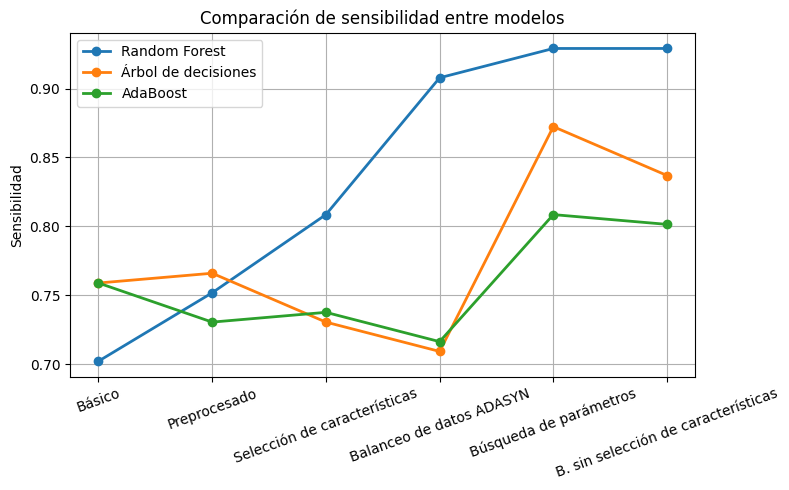

In [100]:
# Extraer la sensibilidad de cada modelo en cada etapa
sensibilidadDT = [
    scoresDTBasico[2],
    scoresDTOutliers[2],
    scoresDTSeleccion[2],
    scoresDTBalanceo[2],
    scoresDTRandomSearch[2],
    scoresDTRandomSearchSinRed[2]
]
sensibilidadRF = [
    scoresRFBasico[2],
    scoresRFOutliers[2],
    scoresRFSeleccion[2],
    scoresRFBalanceo[2],
    scoresRFRandomSearch[2],
    scoresRFRandomSearchSinRed[2]
]

sensibilidadAda = [
    scoresAdaBasico[2],
    scoresAdaOutliers[2],
    scoresAdaSeleccion[2],
    scoresAdaBalanceo[2],
    scoresAdaRandomSearch[2],
    scoresAdaRandomSearchSinRed[2]
]

nombres = [
    "Básico",
    "Preprocesado",
    "Selección de características",
    "Balanceo de datos ADASYN",
    "Búsqueda de parámetros",
    "B. sin selección de características"
]

# --- Gráfica ---
plt.figure(figsize=(8,5))
plt.plot(nombres, sensibilidadRF, marker='o', linewidth=2)
plt.plot(nombres, sensibilidadDT, marker='o', linewidth=2)
plt.plot(nombres, sensibilidadAda, marker='o', linewidth=2)
plt.legend(["Random Forest", "Árbol de decisiones", "AdaBoost"])
plt.title("Comparación de sensibilidad entre modelos")
plt.ylabel("Sensibilidad")
plt.xticks(rotation=20)
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos observar claramente cómo obtenemos una mejora de la sensibilidad cuando hacemos el ajuste de hiperparámetros con la selección de características. La mejor medida de entre todos nos la da Random Forest. El resto experimenta un empeoramiento de la sensibilidad si aplicamos el ajuste de hiperparámetros sin la selección de características. Random Forest, por otra parte, se mantiene estable. Vemos también cómo aumenta notablemente el rendimiento de Random Forest en comparación con los otros modelos al hacer el balanceo de datos con ADASYN. 

In [ ]:
# Extraer la  de cada modelo en cada etapa
sensibilidadDT = [
    scoresDTBasico[0],
    scoresDTOutliers[0],
    scoresDTSeleccion[0],
    scoresDTBalanceo[0],
    scoresDTRandomSearch[0],
    scoresDTRandomSearchSinRed[0]
]
sensibilidadRF = [
    scoresRFBasico[0],
    scoresRFOutliers[0],
    scoresRFSeleccion[0],
    scoresRFBalanceo[0],
    scoresRFRandomSearch[0],
    scoresRFRandomSearchSinRed[0]
]

sensibilidadAda = [
    scoresAdaBasico[0],
    scoresAdaOutliers[0],
    scoresAdaSeleccion[0],
    scoresAdaBalanceo[0],
    scoresAdaRandomSearch[0],
    scoresAdaRandomSearchSinRed[0]
]

nombres = [
    "Básico",
    "Preprocesado",
    "Selección de características",
    "Balanceo de datos ADASYN",
    "Búsqueda de parámetros",
    "B. sin selección de características"
]

# --- Gráfica ---
plt.figure(figsize=(8,5))
plt.plot(nombres, sensibilidadRF, marker='o', linewidth=2)
plt.plot(nombres, sensibilidadDT, marker='o', linewidth=2)
plt.plot(nombres, sensibilidadAda, marker='o', linewidth=2)
plt.legend(["Random Forest", "Árbol de decisiones", "AdaBoost"])
plt.title("Comparación de exactitud entre modelos")
plt.ylabel("Exactitud")
plt.xticks(rotation=20)
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'scoresDTBasico' is not defined

Vemos cómo la exactitud tiene un comportamiento similar a la sensibilidad en el apartado anterior.

# Conclusión

Todo el procesado seguido durante el trabajo ha sido: realizar el preprocesado, con tratamiento de nulos con la mediana, transformar variables object a booleanas utilizando dummies, haber analizado la varianza, tabla de correlación, analizar este preprocesado básico dividiendo nuestro modelo en 80% training y 20% test, estratificado, con nuestros 3 modelos, 1 básico (Decision Tree) y 2 ensambles (Random Forest y AdaBoost), analizando fiabilidad con validación cruzada, overfitting con el valor de validación cruzada y el test del modelo entrenado, eliminar valores atípicos a través de una sustitución de esos valores con la mediana, analizar el preprocesado de la misma manera de antes, selección de características eliminando 6 columnas, análisis de los modelos sobre esto, balanceo de datos comparando entre dos técnicas de balanceo, análisis con los modelos con el preprocesado que llevamos más la técnica elegida, búsqueda de hiperparámetros con RandomizedSearchCV sobre los modelos que hemos ido utilizando y realizamos su análisis, y luego lo comparamos con otra búsqueda de hiperparámetros pero sin selección de características.

Nuestro mejor modelo es Random Forest, que al principio empezó siendo el peor modelo con un resultado en sensibilidad del 70.21% y casi sin overfitting sobre el preprocesado básico; luego mejoró hasta ser el segundo modelo con una sensibilidad del 75.18% y esta vez sin overfitting con el preprocesado avanzado; después mejoró de nuevo hasta convertirse en el mejor modelo con una sensibilidad del 80.85% sin overfitting en selección de características; mejoró aún más llegando hasta un 90.78% en sensibilidad ya con un poco de overfitting cuando se hace balanceo de datos; y que mejoró otra vez, con búsqueda de hiperparámetros, hasta un 92.91% de sensibilidad, con un overfitting del 1.6%, que es un valor muy bajo y permisible.  Su validación cruzada (con training) tiene de sensibilidad media de 94.5% con desviación típica media de 01.19%, siendo incluso superior a su valor sin reducción de características, que presenta mayor overfitting y menor sensibilidad media. Por lo tanto, nos quedamos con la versión de selección de características con todo el preprocesado.

Nuestro segundo mejor modelo es Decision Tree. Al principio era uno de los mejores modelos junto con AdaBoost con un resultado de 75.89% sin overfitting sobre preprocesado básico; luego continuó siendo el mejor modelo con un aumento de resultado del 76.6% de sensibilidad sin overfitting sobre el preprocesado avanzado; después en la selección de características, el modelo cayó hasta un 73.05% de sensibilidad, convirtiéndose en el peor modelo de los 3, aunque sigue sin presentar overfitting, sus resultados siguen disminuyendo con el balanceo de datos, bajando hasta un 70.92% quedándose, una vez más, como el peor modelo, y también presenta algo de overfitting. Con respecto a búsqueda de hiperparámetros, el modelo da un gran aumento hasta un 87.23% de sensibilidad, con un 2.37% de overfitting despreciable. Además su validación cruzada (con training) tiene de sensibilidad media un 89.61% con desviación típica media de 1.75%. El modelo sin selección de características presenta peores resultado con un mayor overfitting, por lo que sin duda nos quedamos con la version con selección de características con todo el preprocesado.

Nuestro peor modelo es AdaBoost. Al principio era de los mejores junto con Decision Tree con un resultado del 75.89% de sensibilidad sin overfitting con preprocesado básico; luego bajó a ser el peor modelo con un 73.05% de sensibilidad con un poco de overfitting sobre el preprocesado avanzado; después en la selección de características, tiene una mejoría mínima de hasta 73.76% de sensibilidad sin overfitting, convirtiéndose en el segundo mejor modelo; más tarde, con balanceo de datos presenta un empeoramiento de 71.63% ya con un overfitting bastante grande, por lo que, se mantiene siendo el segundo mejor modelo, aunque también podría ser el peor modelo perfectamente desde aquí. Con búsqueda de hiperparámetros, AdaBoost tiene un 80.85% de sensibilidad, con un gran overfitting de 11.56%, siendo el peor modelo por sensibilidad y por overfitting, con validación cruzada (con training) tiene una sensibilidad media de 92.41% con desviación típica media de 3.89%. Sin reducción de características da resultados peores y mayor overfitting, haciendo que funcione mejor cuando hay selección de características con el preprocesado.

Por lo tanto, hemos visto que nuestro mejor modelo es Random Forest, aunque empezó siendo el peor, va mejorando desde que realizamos el perprocesado avanzado, sintiendo un gran aumento con el balanceo de datos, signo de que el modelo Random Forest mejora mucho su funcionamiento cuando hay datos balanceados. Con Decision Tree, aunque mejora con el tratamiento de valores atípicos, mejora cuando hacemos selección de caracerísticas y balanceo de datos, dando a entender que funcionase con las variables y datos originales (modificados con preprocesado) del dataset, luego mejora con búsqueda de hiperparámetros. Con AdaBoost, podemos ver como es un modelo que va bajando con cada preprocesado, siendo ya un gran empeoramiento cuando hay un balanceo de datos, ya que empeora grandemente su overfitting, haciendo ver que los valores inventados por ADASYN no son los mejores con este modelo, y luego aunque mejora sus resultados con búsqueda de hiperparámetros, su overfitting sigue siendo bastante grande, por lo que es un modelo bastante malo.

Para finalizar, dejar claro que nuestros modelos mejoran cuando hacemos la selección de características, haciendo que haya mejores resultados en sensibilidad y exactitud, y valores más bajos de overfitting, haciendo ver que las variables extras que teniamos era una carga de datos que bajaba la funcionalidad de nuestros modelos, por lo que ha sido una técnica clave para nuestro propósito.

| Etapa                                     | Mejor -> Peor                              |
|-------------------------------------------|--------------------------------------------|
| Preprocesado básico                       | Decision Tree ~ AdaBoost > Random Forest   |
| Preprocesado avanzado                     | Decision Tree > Random Forest > AdaBoost   |
| Selección de características              | Random Forest > AdaBoost > Decision Tree   |
| Balanceo de datos (ADASYN)                | Random Forest > AdaBoost > Decision Tree   |
| Búsqueda de hiperparámetros (Randomized)  | Random Forest > Decision Tree > AdaBoost   |
| Búsqueda de hiperparámetros (sin reduc.)  | Random Forest > Decision Tree > AdaBoost   |

# Consultas IA Generativa



**Prompt:** Apartir del siguiente código para selección de características, genera un bucle que aplique el algoritmo con cada número de variables, genera una visualización para cada número de variables con la sensibilidad. Para aplicar el método del codo para la selección de características.
```Python
from sklearn.pipeline import Pipeline 
from sklearn.feature_selection 
import RFE 
n_features_to_select = 3
rfe = RFE(RandomForestClassifier(random_state=semilla), n_features_to_select=n_features_to_select) 
model = RandomForestClassifier(random_state=semilla)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1)
print('Sensibilidad: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
```

**Respuesta:**
```Python
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

semilla = 42
resultados = []
num_features = []

# Número total de características
total_features = X_train.shape[1]

# Evaluamos desde 1 hasta todas las variables
for k in range(1, total_features + 1):

    # RFE seleccionando k características
    rfe = RFE(RandomForestClassifier(random_state=semilla),
              n_features_to_select=k)

    # Pipeline: RFE + modelo final
    model = RandomForestClassifier(random_state=semilla)
    pipeline = Pipeline([('rfe', rfe), ('model', model)])

    # Validación cruzada
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=semilla)
    scores = cross_val_score(pipeline, X_train, y_train, scoring='recall',
                             cv=cv, n_jobs=-1)

    resultados.append(np.mean(scores))
    num_features.append(k)

    print(f"Características: {k}, Sensibilidad: {np.mean(scores):.4f}")

# --- Gráfica del método del codo ---
plt.figure(figsize=(8,5))
plt.plot(num_features, resultados, marker='o')
plt.xlabel("Número de características seleccionadas (k)")
plt.ylabel("Sensibilidad (Recall)")
plt.title("Método del codo para selección de características (RFE)")
plt.grid(True)
plt.show()
```

**Validación y cambios:** De este resultado se modifico para utilizar 2 métricas y se comprobo que se ajustaba al código original que se le paso como base.

**Prompt:** puedes hacerme un histograma en notebook jupyter donde se pueda ver la distribucion de valores de una variable con respecto a la variable objetivo?

**Respuesta:**
```Python
# Importamos librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df
# 'variable' es la columna que quieres analizar
# 'objetivo' es la columna objetivo

# Creamos el histograma
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='variable', hue='objetivo', multiple='stack', kde=False)
plt.title('Distribución de "variable" según "objetivo"')
plt.xlabel('Variable')
plt.ylabel('Frecuencia')
plt.show()
```

**Validación y cambios:** Se utilizó para implementar los histogramas de la sección de "Selección de características", en el cual se modifico algunos valores para adaptarlo a nuestro código

# Librerías utilizadas

In [102]:
# Librerrías con la que se ha realizado el notebook
from sinfo import sinfo
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
imblearn    0.14.0
matplotlib  3.10.6
numpy       2.3.3
pandas      2.3.3
scipy       1.16.2
seaborn     0.13.2
sinfo       0.3.4
sklearn     1.7.2
-----
IPython             9.6.0
jupyter_client      8.6.3
jupyter_core        5.8.1
jupyterlab          4.4.9
notebook            7.4.7
-----
Python 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
Windows-10-10.0.26100-SP0
16 logical CPU cores, AMD64 Family 25 Model 80 Stepping 0, AuthenticAMD
-----
Session information updated